# Работа с отсутствующими данными(пропущенными данными, Missing Data)

## Важно: не существует единственного стопроцентного способа сделать такую очистку правильно. В этом блокноте приведён всего лишь один из примеров того, как это можно сделать для конкретного файла с данными.

### Некоторые применённые здесь методы могут не привести к оптимальной производительности модели, они приведены для демонстрации различных доступных методов.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('../DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Здесь мы открываем файл с описанием признаков с помощью функции `open`, далее выводим содержимое файла на экран с помощью `print`. Конструкция `with` нужна для того, чтобы в конце автоматически закрыть файл.

In [5]:
df = pd.read_csv('../DATA/Ames_outliers_removed.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

## Удаление колонки PID
У нас уже есть индекс, поэтому для работы регрессии нам не нужен уникальный идентификатор PID.

In [9]:
# axis=1, так как это колонка
df = df.drop('PID', axis=1)

In [11]:
len(df.columns)

80

## Проверка отсутствующих значений

In [13]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Мы получаем True в тех ячейках, где значения отсутствуют.

Посчитаем количество пропущенных значений. True = 1, False = 0

In [15]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [17]:
df.isnull().sum() > 0

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

Посмотрим, каково значение пропущенных строк в процентном соотношении.

In [19]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

Оформим результаты для всех признаков. Для этой цели - создадим собственную функцию, так как далее придётся вычислять эти проценты по мере того, как будут вноситься изменения в данные.

In [21]:
def percent_missing(my_df):
    '''
    Функция для вычисления процента пропущенных строк в датафрейме.
    '''
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result

In [23]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

Здесь мы видим все признаки, у которых есть пропущенные значения.

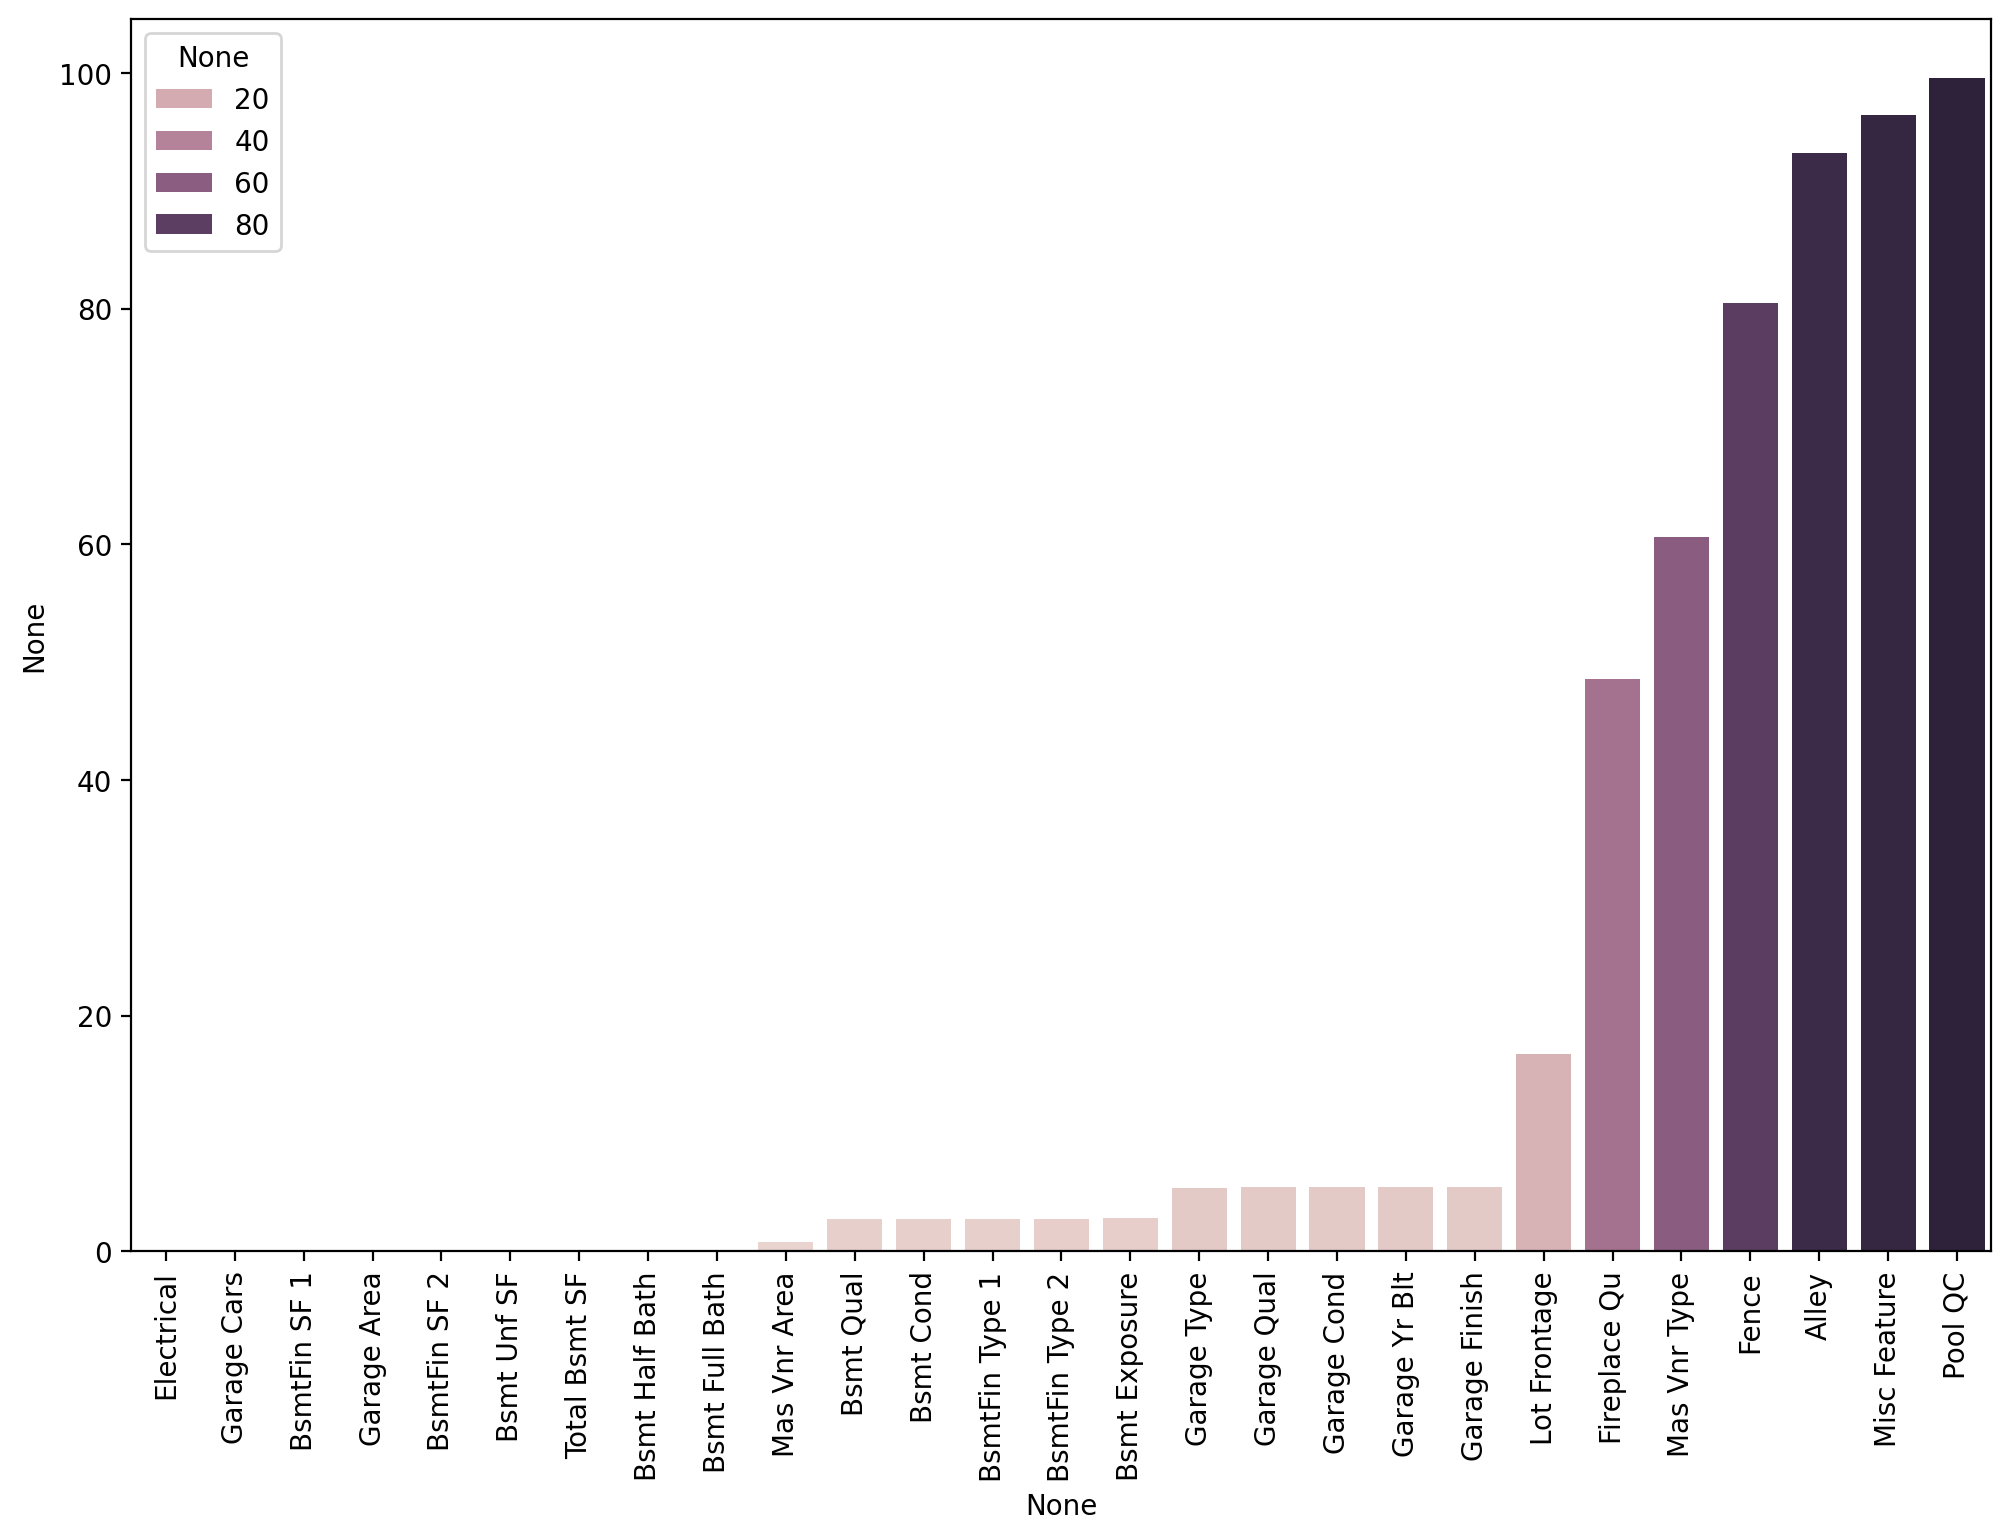

In [25]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.show()

# Удаление признаков или удаление строк
Если значения отсутствуют только в нескольких строках, количество которых мало по сравнению с общим количеством строк, то можно рассмотреть вариант удалить такие строки. К чему это приведёт с точки зрения точности работы модели? По сути, мы удаляем некоторые данные для обучения и тестирования, но поскольку таких строк очень мало, то скорее всего мы не сильно повлияем на точность модели.

Если же значения отсутствуют почти во всех строках, то имеет смысл полностью удалить такие признаки. Однако перед этим следует внимательно разобраться, почему неопределённых значений так много. В некоторых случаях можно рассмотреть такие данные как отдельную категорию, отдельно от остальных данных.

В качестве примера возьмём признак "количество машин, которые могут поместиться в гараже". Но если гаража вообще нет, то вместо значения 0 может проставляться неопределённое значение null. В таким случае имеет смысл заменить значения null на нули. Только Вы можете решить, что делать с неопределёнными значениями! Используйте Ваши знания о предметной области и специфике данных!

## Работа с отсутствующими данными в строках
### Заменять данные чем-то или удалять?
В каких случаях лучше заменять отсутствующие данные какими-то значениями (например, средним значением), а в каких случаях удалять такие строки. Выберем некоторое пороговое значение (threshold) и договоримся, что при его привышении - решаем удалять строки (вместо того, чтобы заменять отсутствующее значение каким-то другим значением). Выберем пороговое значение 1%. Это значит, что если меньше 1% строк содержат неопределённое значение какого-то признака, то мы просто удалим такие строки. Здесь нет правильного ответа на вопрос, какое следует выбрать пороговое значение. Можно использовать знания о специфике предметной области, но в любом случае пороговое значение не должно быть очень большим, например 50%.

Глядя на текстовое описание признаков, заметно, что в нашем случае значения NaN проставляются намеренно - они означают 0 или "нисколько".

### Пример замены(заполнения) данных

Укажем для графика лимит по оси Y от 0 до 1. Поскольку по оси Y откладываются проценты от 0 до 100, то сейчас мы посмотрим только значения от 0 до 1, потому что скорее всего мы согласимся с тем, чтобы удалить 1% строк.

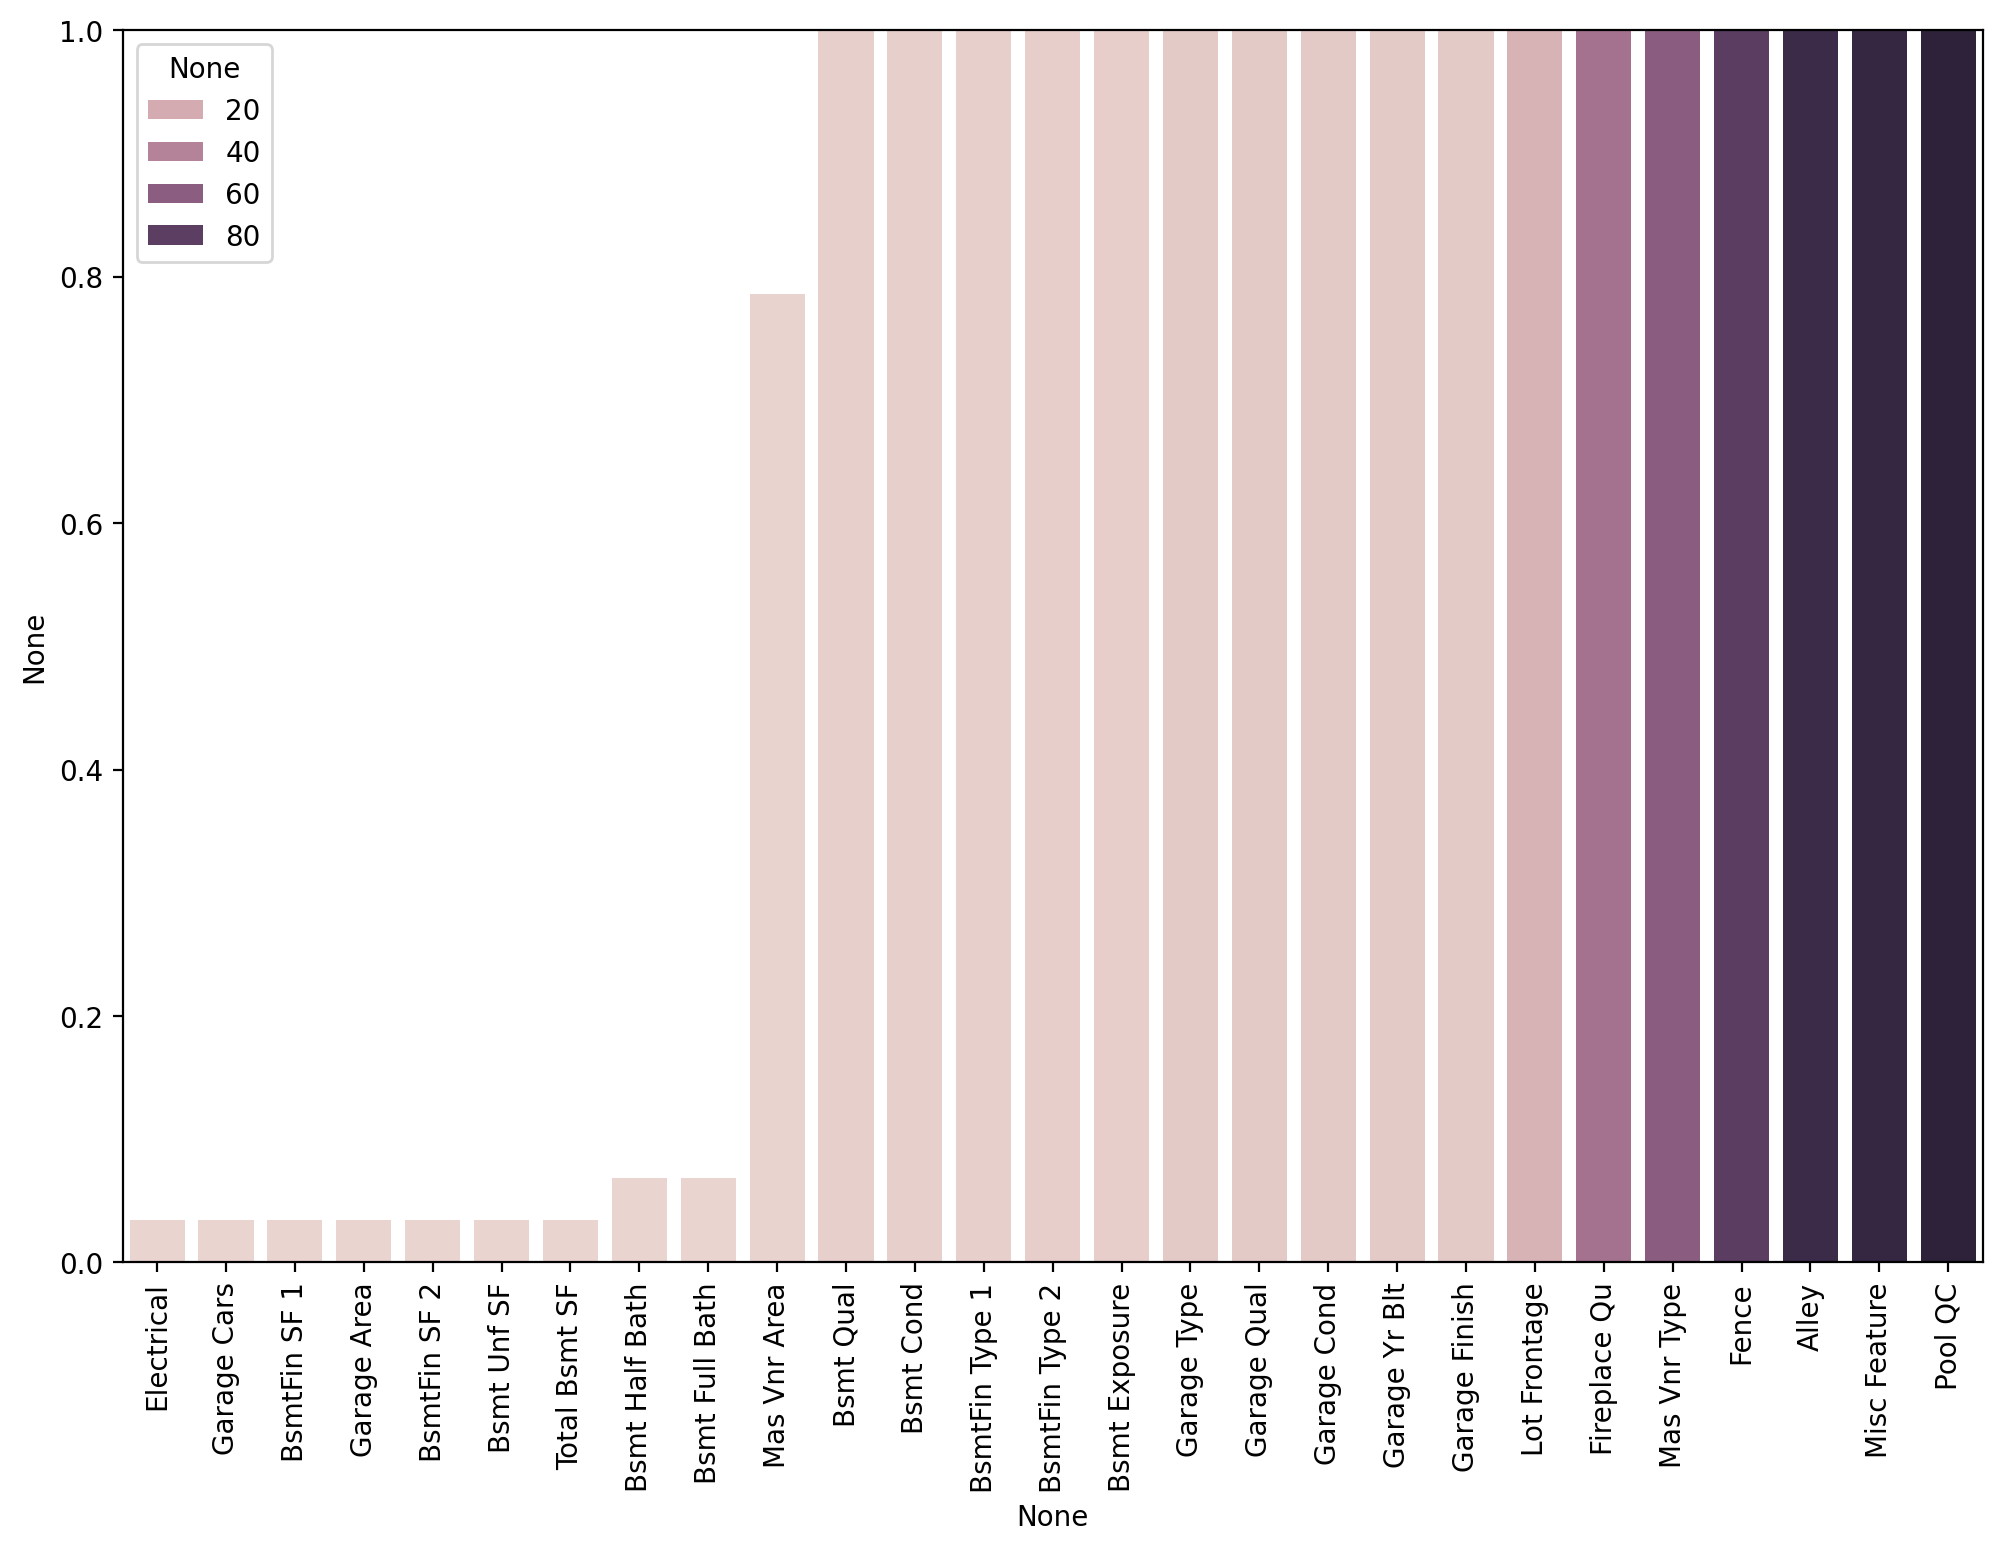

In [27]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

В левой части графика мы видим признаки, для которых процент < 1. Именно для таких признаков и был построен этот график, чтобы их было лучше видно.

В правой части графика - признаки, для которых процент > 1, но так как установлен лимит в 1% - их не видно в полный размер.

In [29]:
# Выберем все признаки для которых процент меньше 1
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

Что в этом примере означает процент 0.03?  
Выполним обратную калькуляцию и увидим, что это одна строка.

In [31]:
100/len(df)

0.0341646737273659

In [33]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [35]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [37]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### Удаление строк
Некоторые признаки имеют только одну-две строки с отсутствующими значениями. На основе файла .txt с описанием признаков набора данных, можно было бы легко заполнить эти данные некоторыми значениями, и это было бы отличное решение. Однако, здесь посмотрим, как удалять такие строки - это пригодится в тех случаях, когда у нет хорошей интерпретации того, что означают отсутствующие значения.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [39]:
# Работаем со строками -> axis=0
df = df.dropna(axis=0, subset=['Electrical', 'Garage Area'])

Здесь мы для всего датафрейма смотрим только на две колонки, и если в них встречается неопределённое значение - то мы удаляем такие строки.

In [41]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

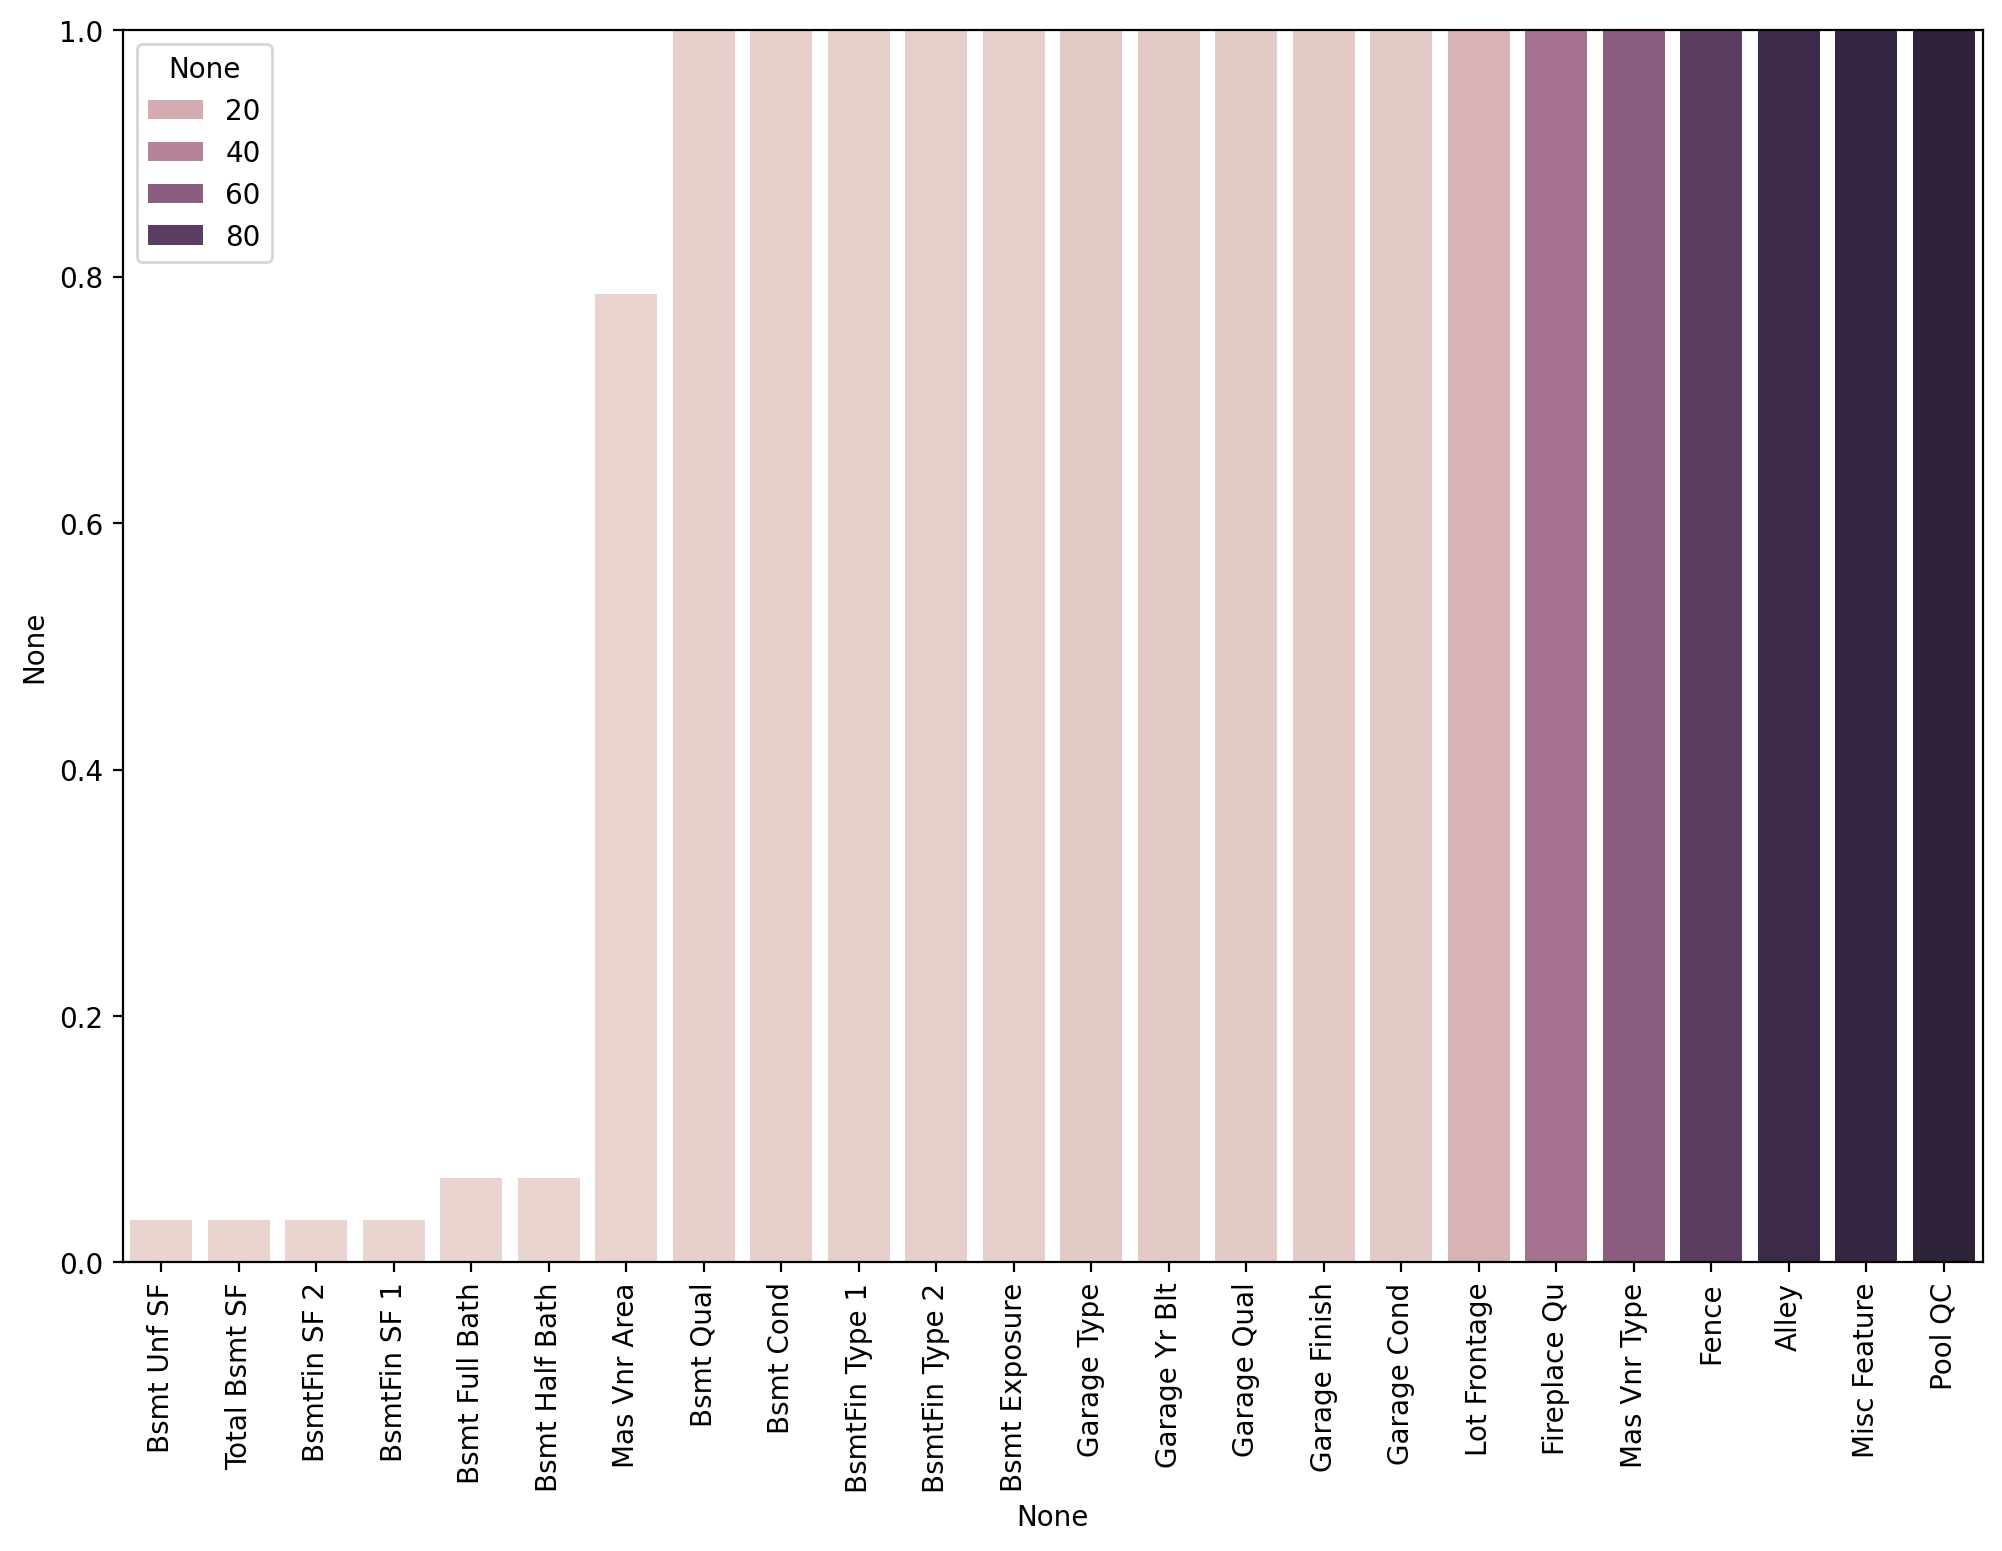

In [43]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

**Заполняем данные на основе названий колонок. Здесь у нас есть два типа 2 признаков - числовые признаки и текстовые описания.**

Числовые колонки - заменим отсутствующие значения на 0:

In [45]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [47]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [49]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [51]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
# Заменяем отсутствующие значения на 0, только для выбраных колонок
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

Текстовые колонки - заменим отсутствующие значения на 'None' - в **текстовом(!!!)** виде:

In [53]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [55]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [57]:
percent_nan = percent_missing(df)

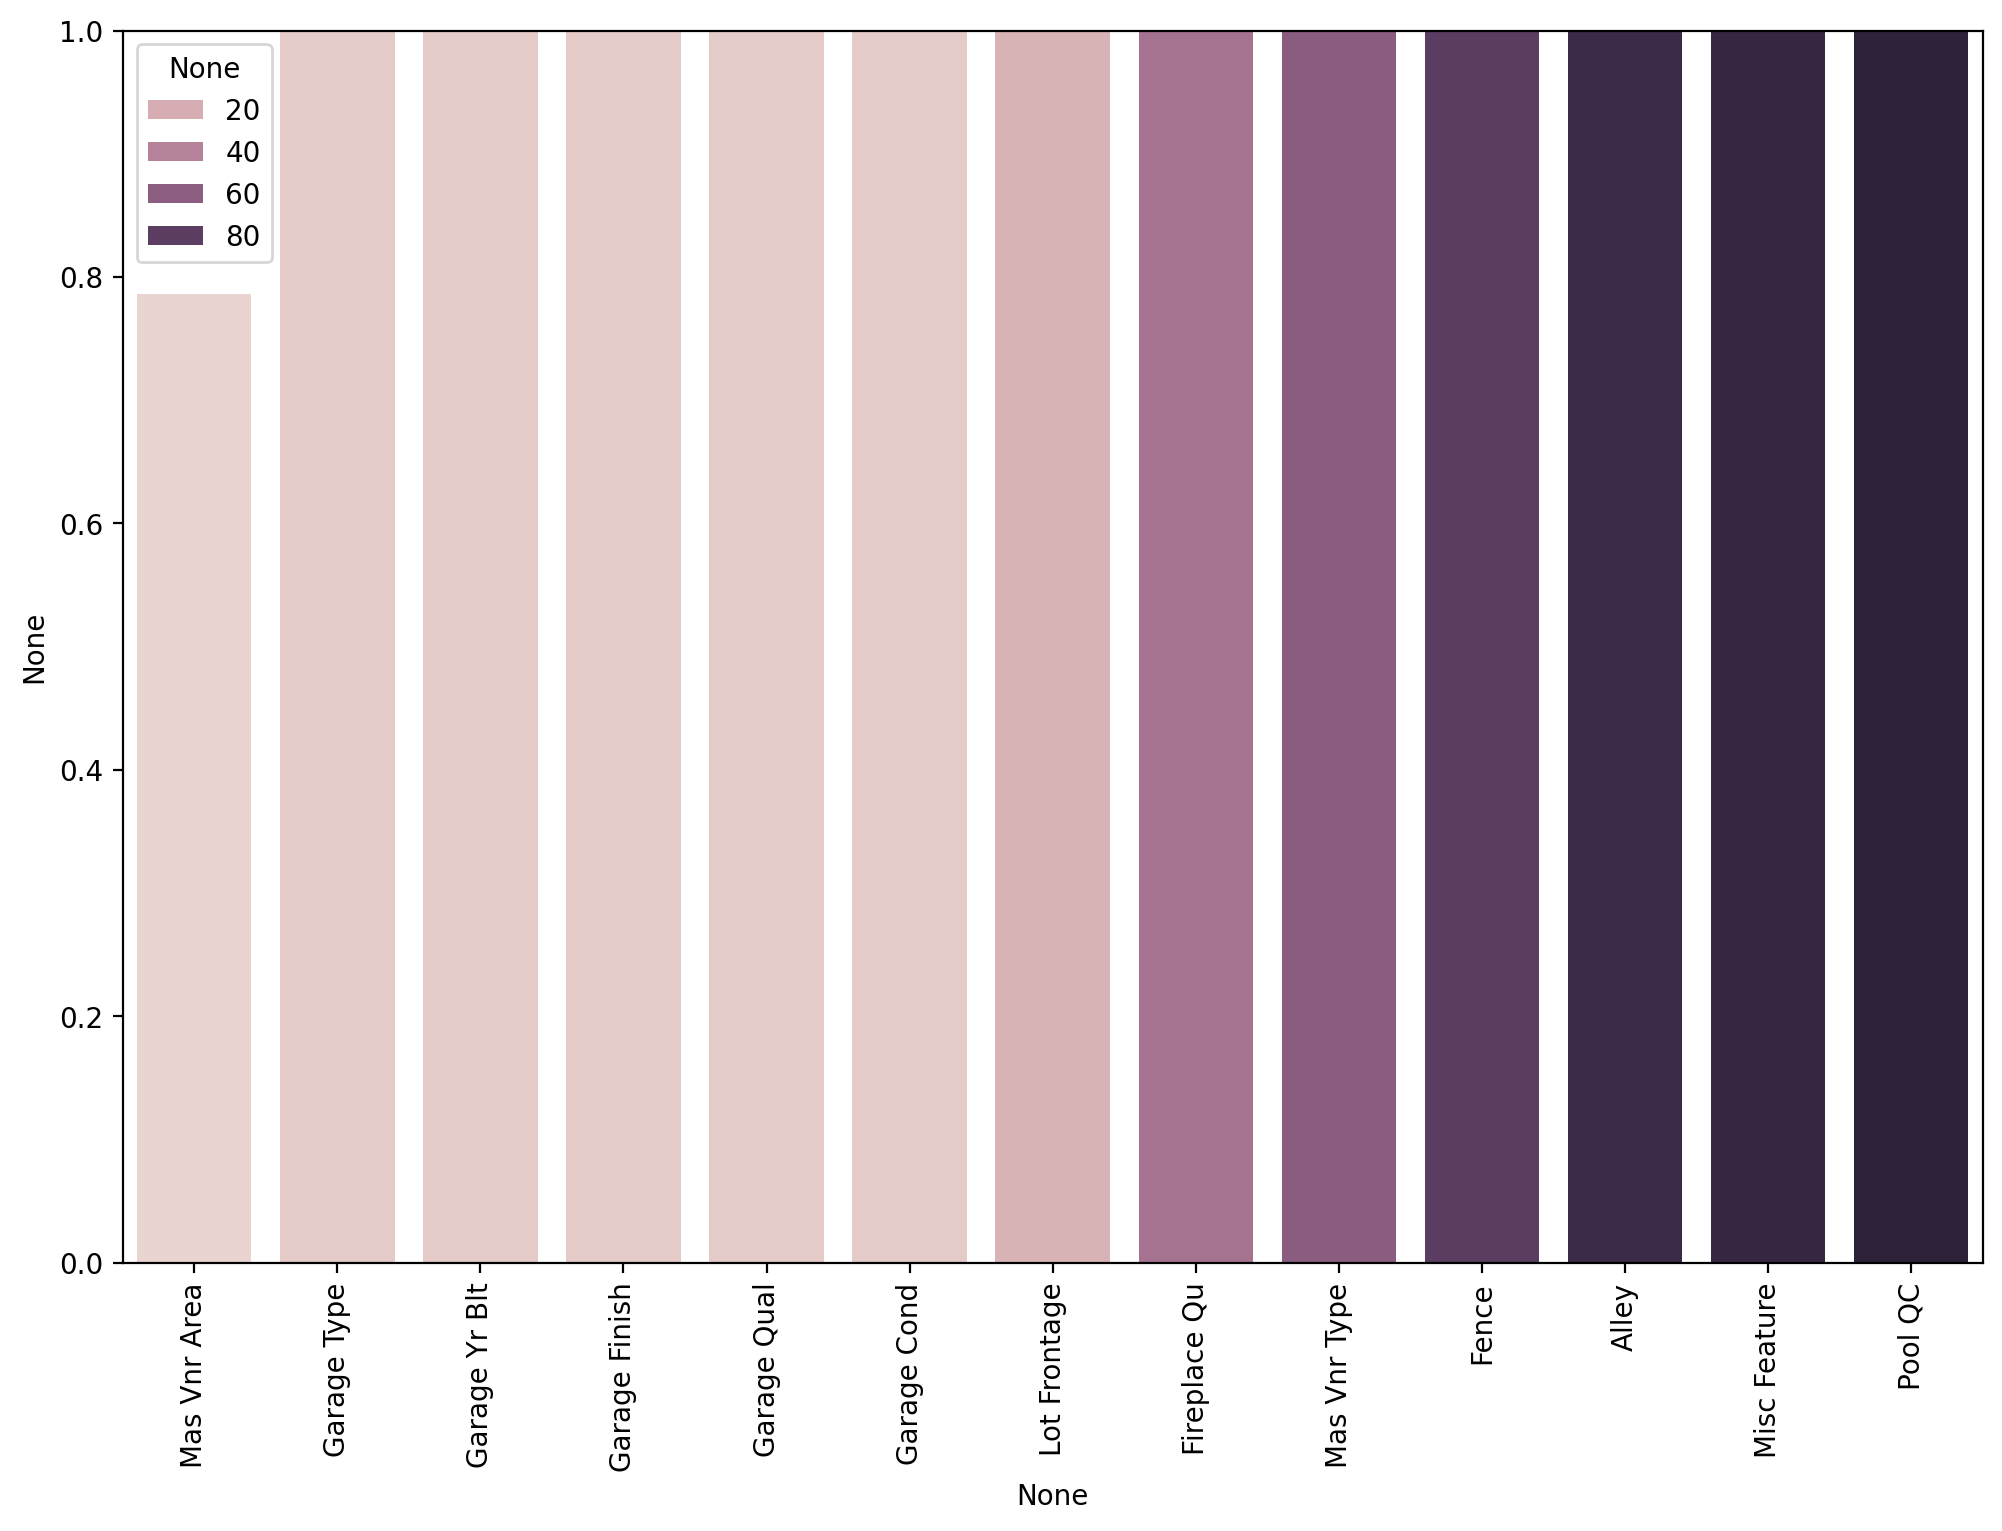

In [59]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

### Признак "Mas Vnr"
На основе текстового описания набора данных, отсутствие данных в признаках Mas Vnr Type и Mas Vnr Area скорее всего означает, что дом не имеет облицовки каменной плиткой, и в этом случае - укажем нулевое значение, как уже делали раньше для других признаков.

In [61]:
# В новых версиях Pandas значение None преобразуется в неопределённое
# значение раньше - в методе read_csv
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [63]:
percent_nan = percent_missing(df)

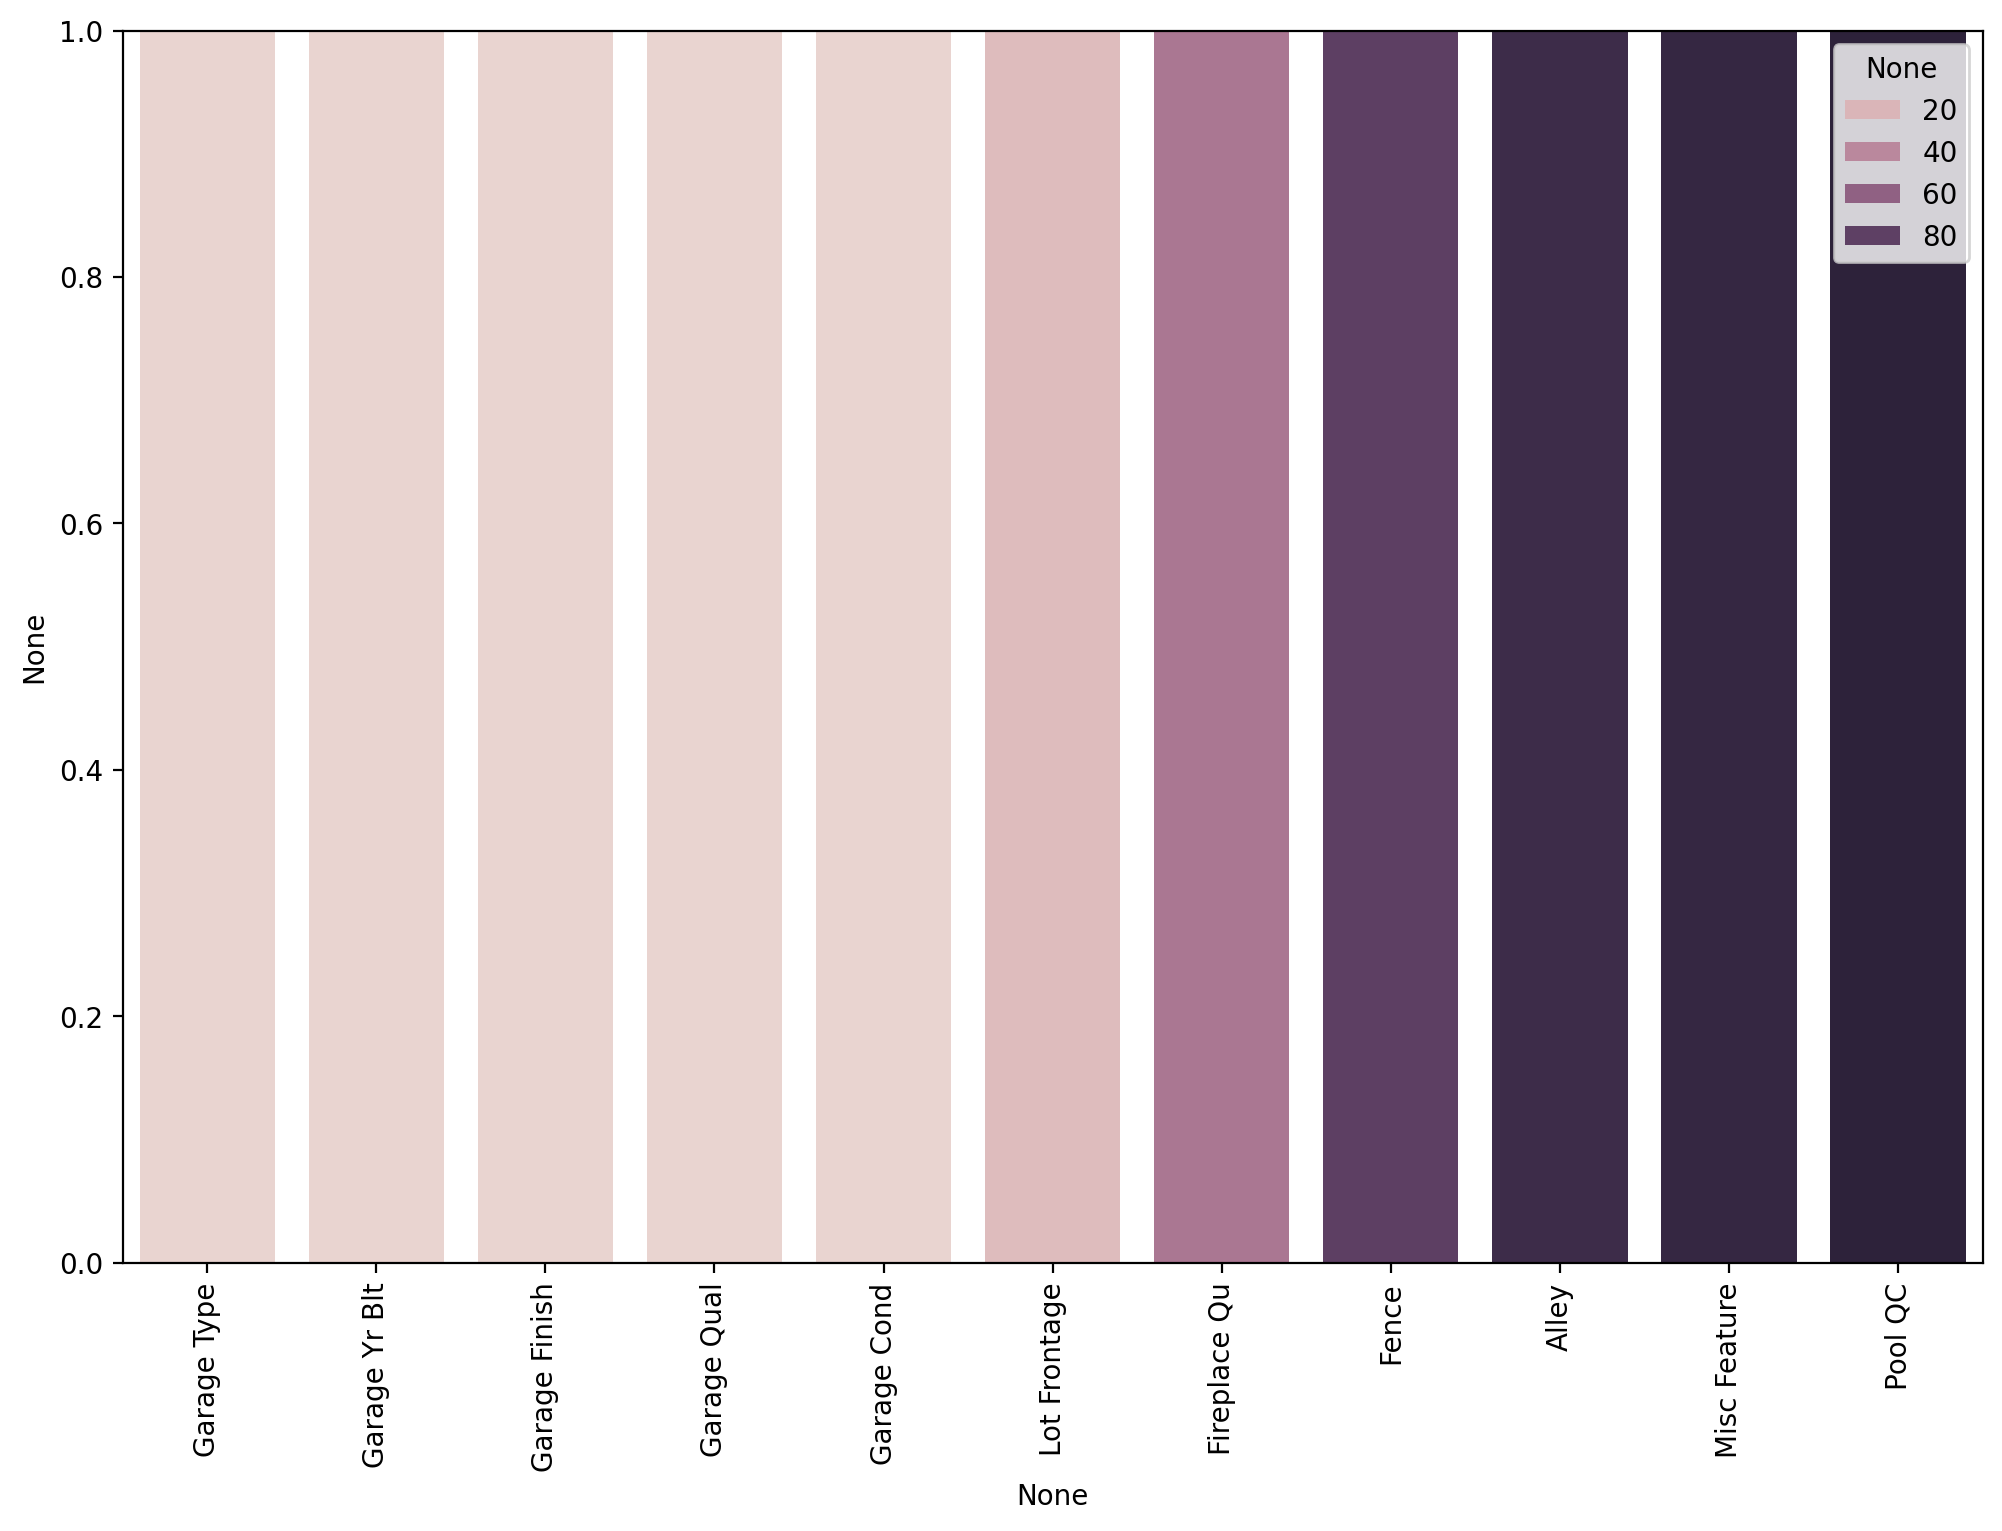

In [65]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

В полученном результате все признаки имеют значение процентов большее чем 1.

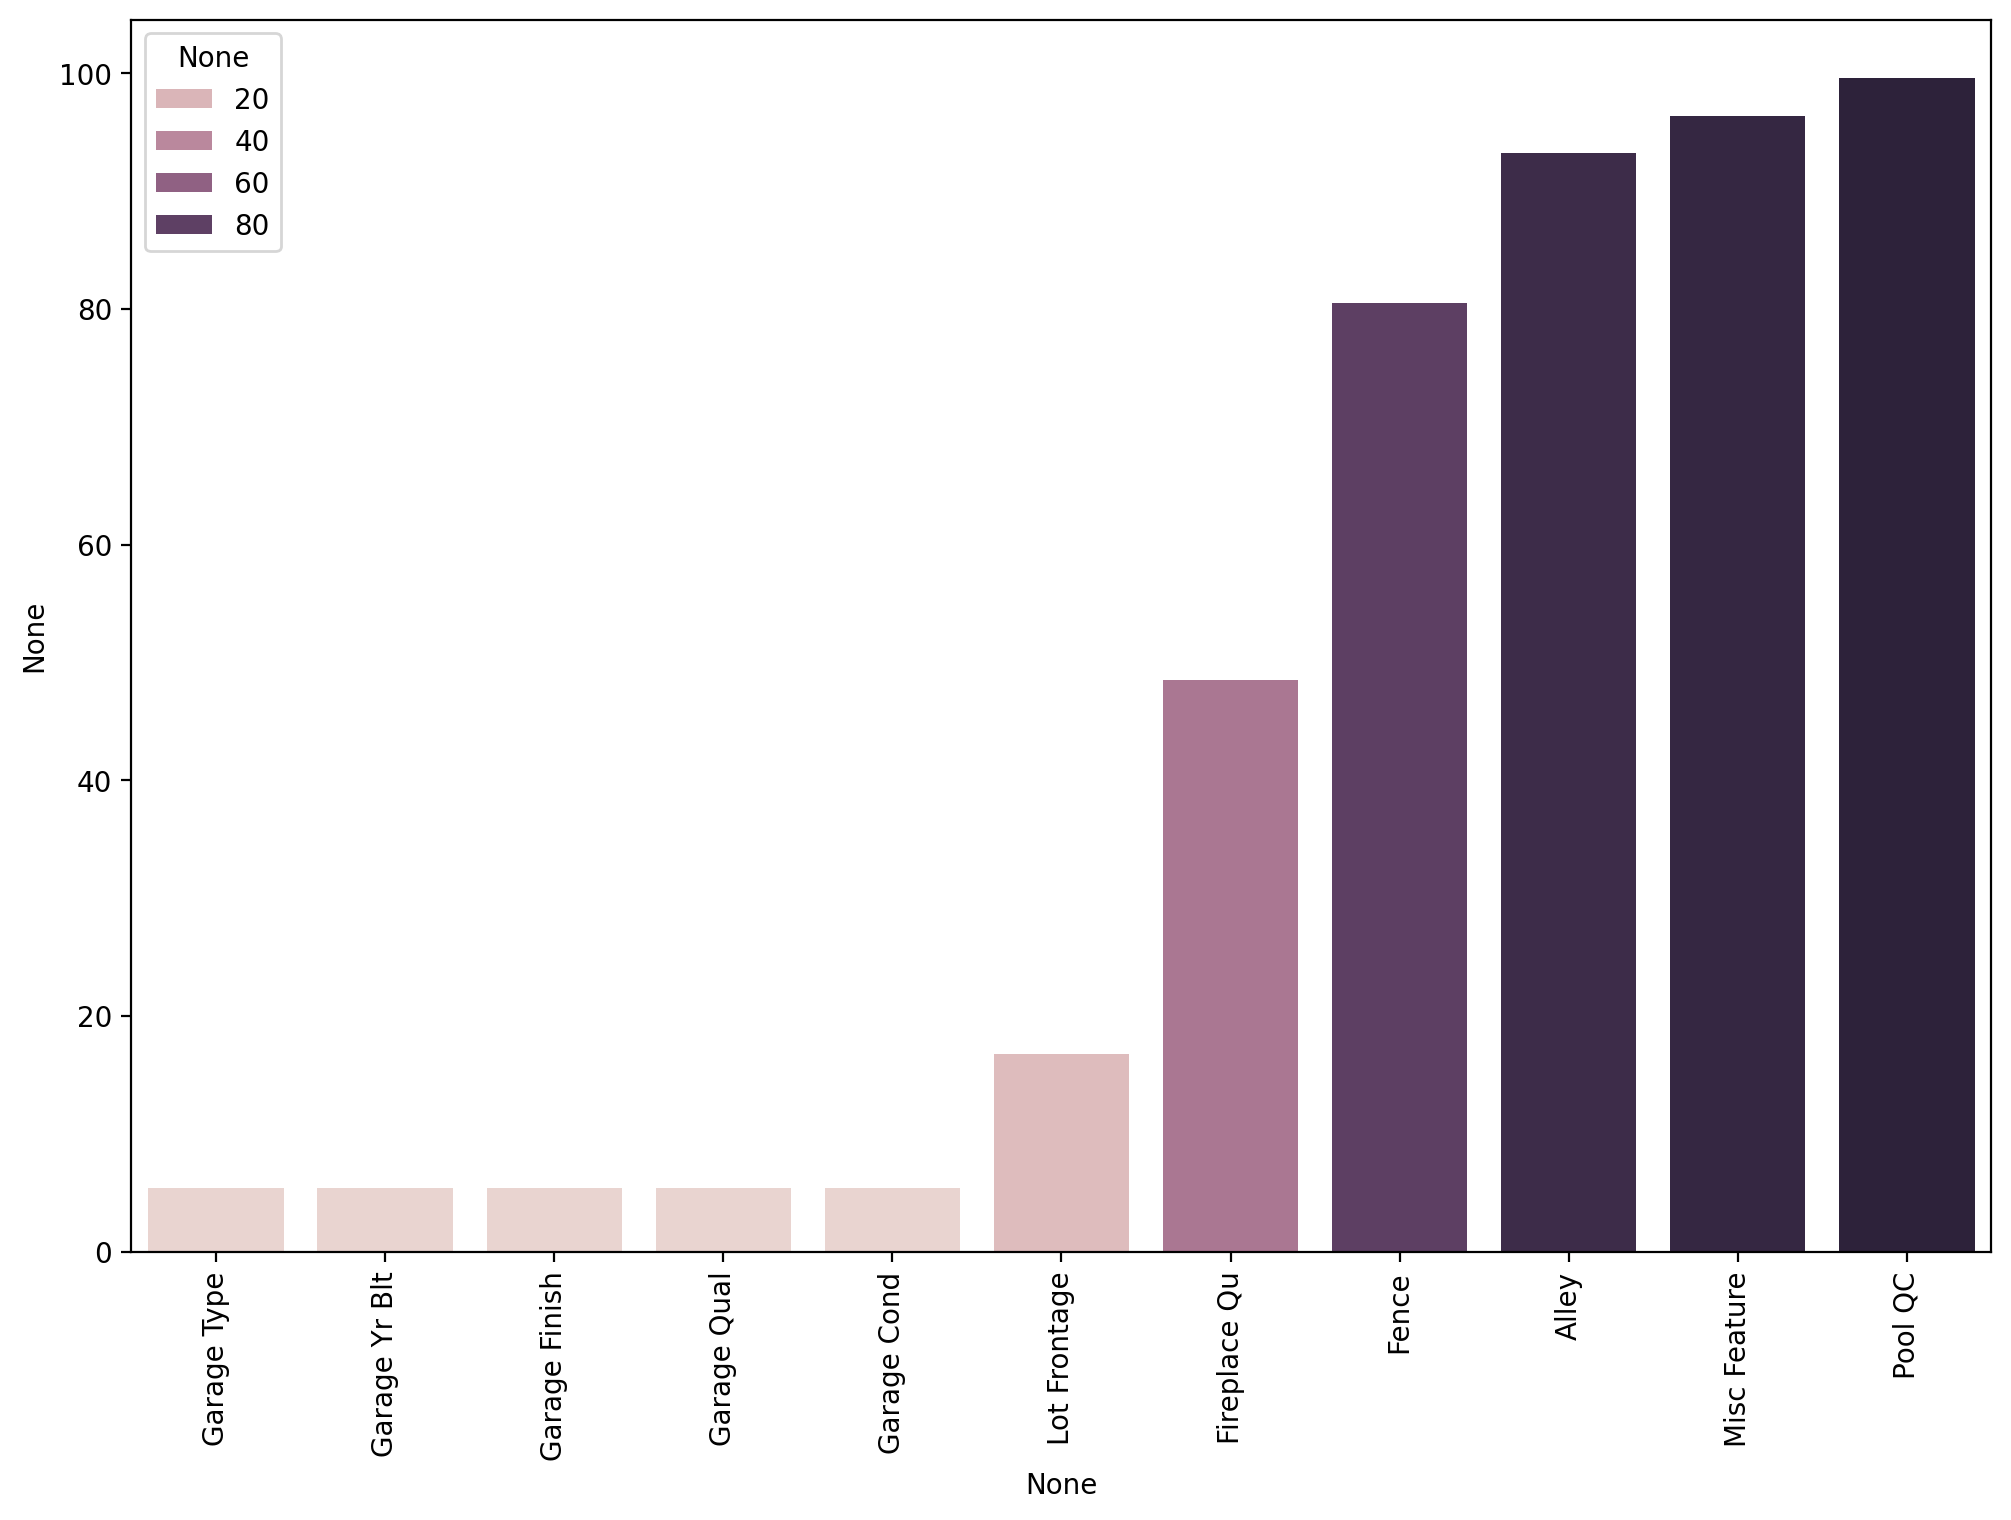

In [67]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.show()

# Работа с отсутствующими данными в колонках
Два подхода:
1. Заполнить колонки некоторыми значениями
2. Удалить колонки

Для подхода, когда решено удалить колонки:
* Очень просто сделать
* Не нужно больше беспокоиться об этих признаках
* Можем потерять признак с важными значениями
* Удалять колонки имеет смысл, когда много строк имеют значения NaN

Для подхода, когда решено заполнить колонки некоторыми значениями:
* Потенциально меняем истинность исходных данных
* Необходимо самостоятельно выбирать способ, какое значение записать
* Необходимо будет применять трансформарции для всех будущих данных(если в новых данных будут также значения NaN) + необходимо вместе с моделью сохранять объекты для трансформации данных

Подход "заполнить каким-то значением":
    
    1. Простой случай:
     * Заменить значения NaN на нули, если по факту неопределённые значения являются нулевыми значениями
    2. Сложный случай:
     * Применяем статистические методы с использованием других колонок, чтобы заполнить значения NaN

In [75]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [77]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
# Заменяем отсуствующие значения ТЕКСТОВЫМ значением None
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [79]:
percent_nan = percent_missing(df)

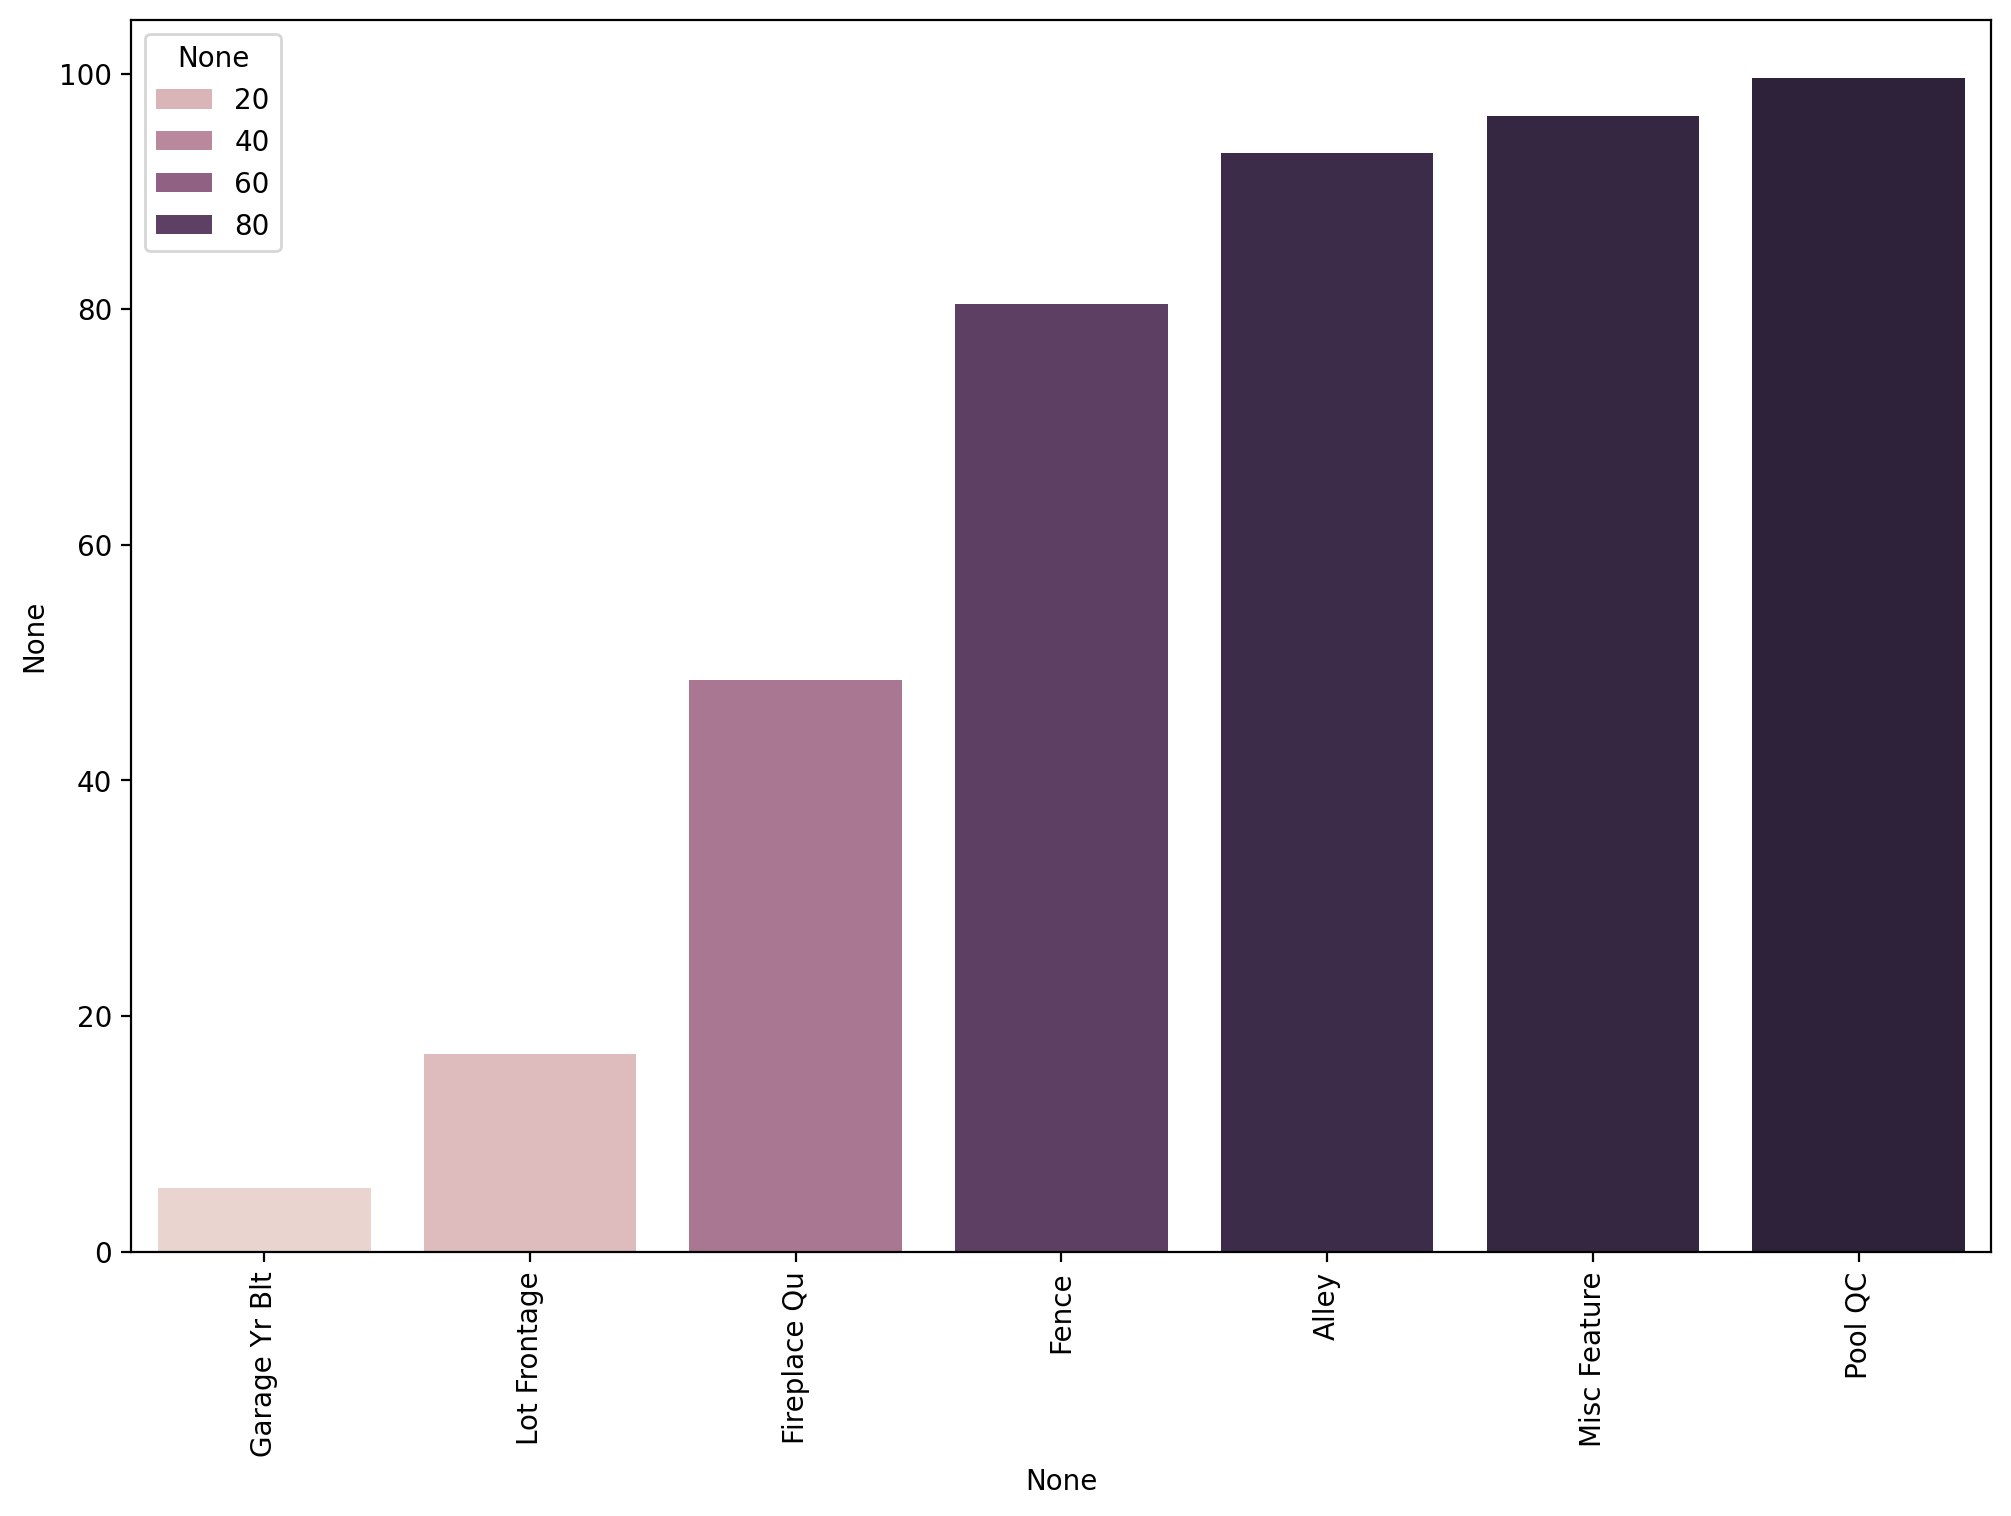

In [81]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.show()

Для колонки **'Garage Yr Blt'** неопределённое значение означает отсутствие гаража, заменим это значение на 0.

In [85]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [87]:
percent_nan = percent_missing(df)

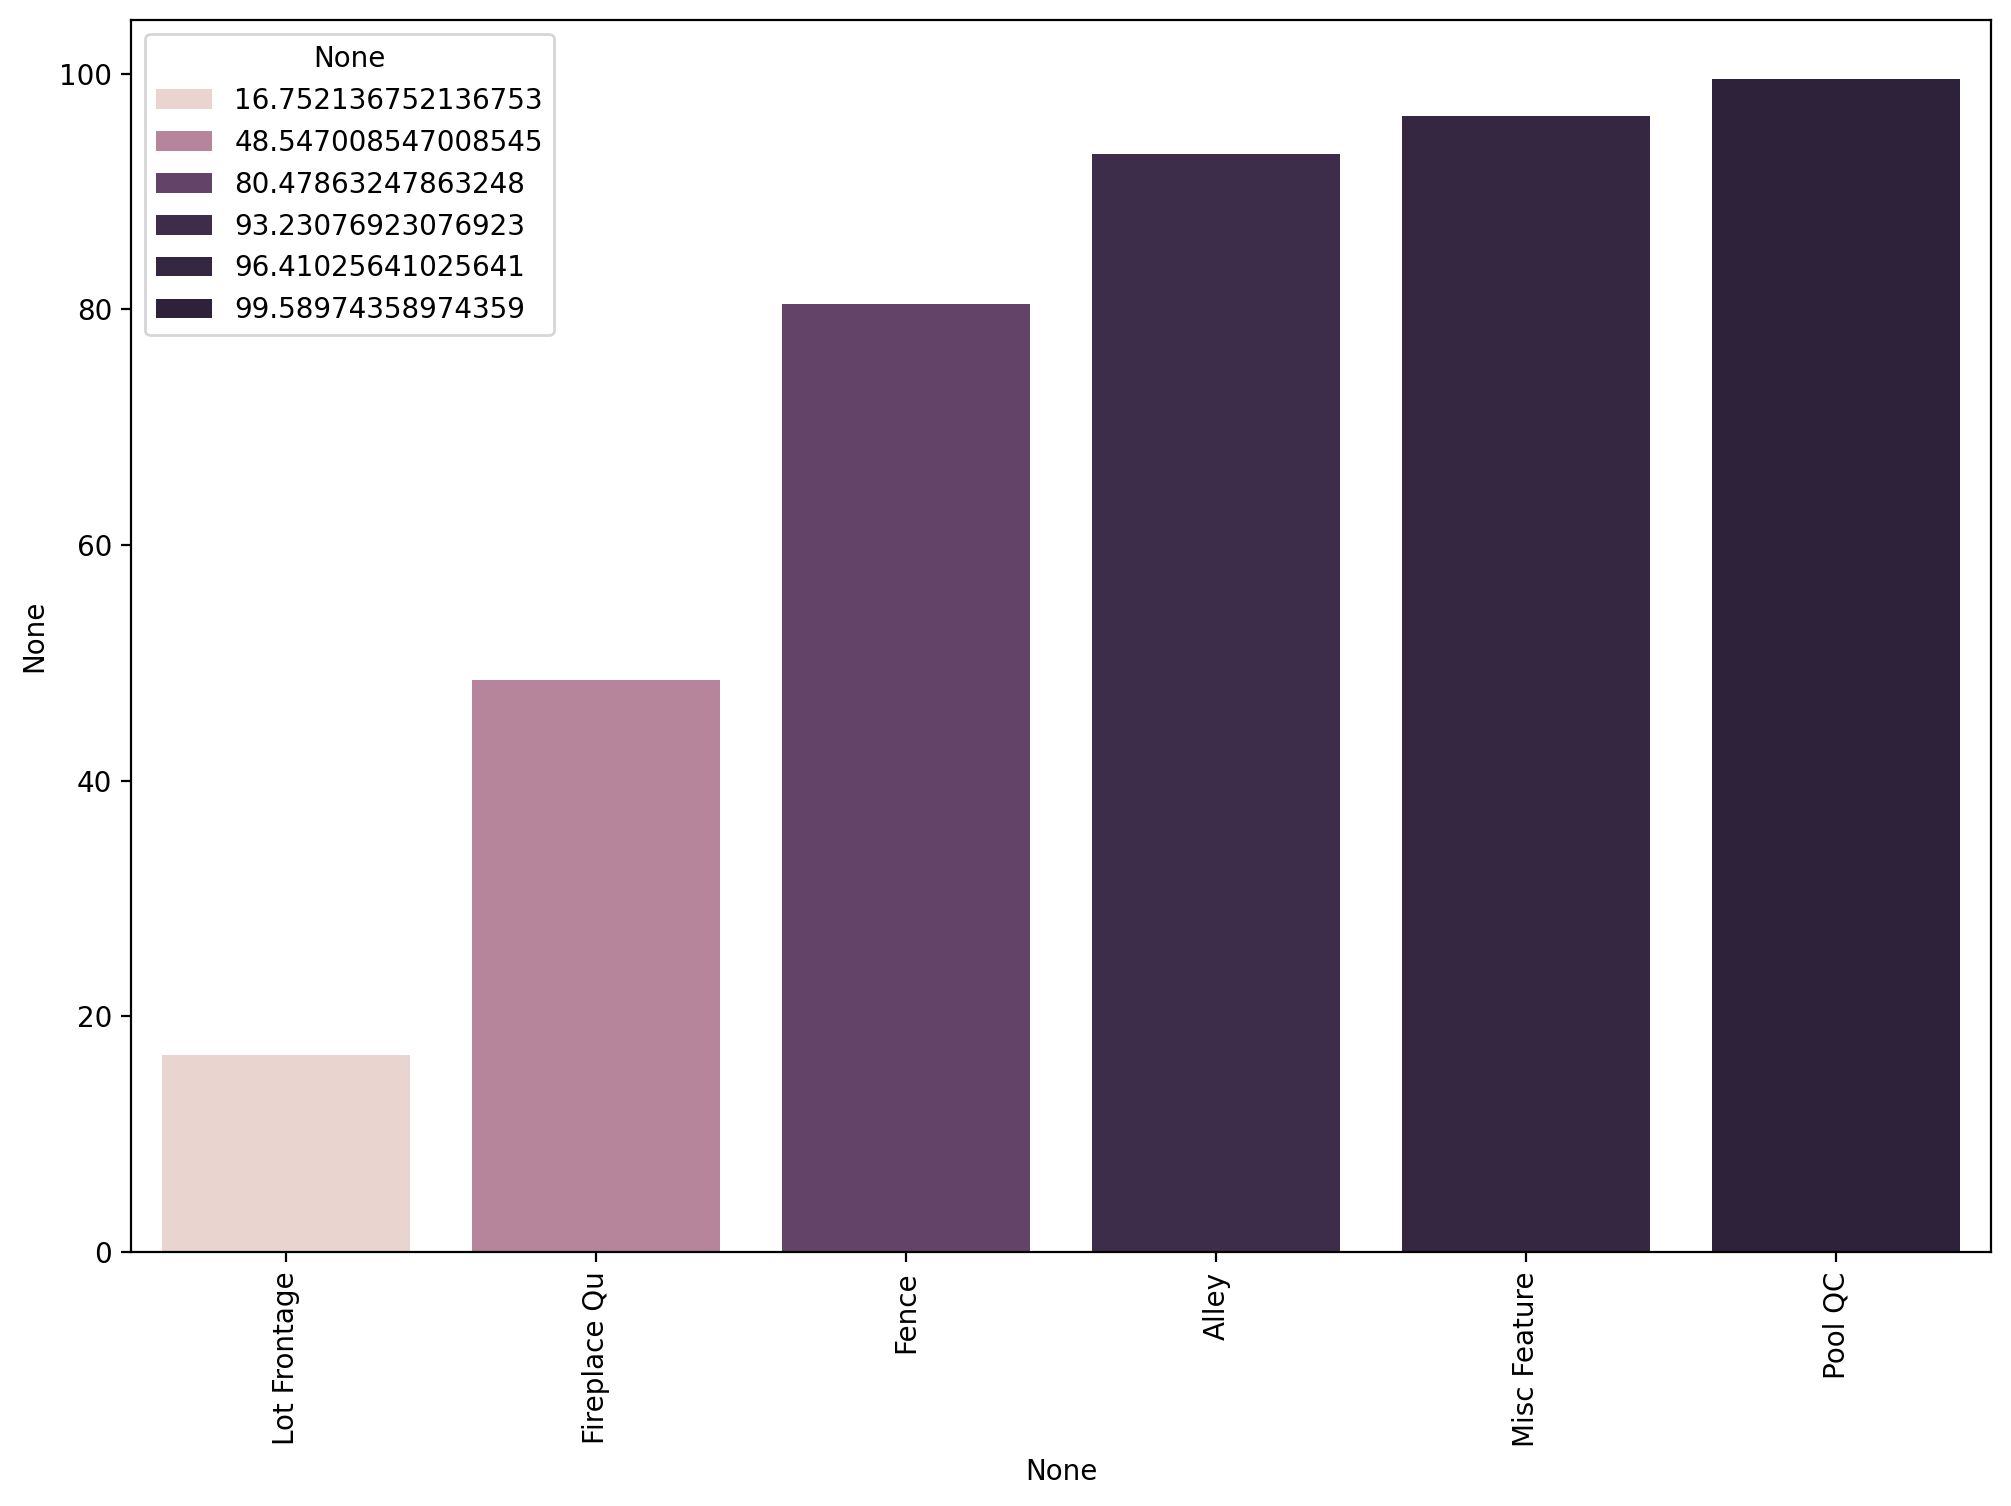

In [89]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.show()

## Удаление колонок с признаками
Если значения отсутствуют в достаточно большом количестве строк, то имеет смысл удалить такие колонки полностью. Например, если 99% строк имеют неопределённое значение в каком-то признаке, то этот признак не сможет использоваться для предсказывания целевой переменной, поскольку почти все данные в этом признаке неопределены. В нашем наборе данных, многие из признаков с большим количеством значений NaN по сути должны содержать значения "none" или 0. Но чтобы посмотреть различные варианты работы с отсутствующими значениями - удалим эти признаки вместо того, чтобы заполнить отсутствующие значения нулями или "none"

In [91]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [93]:
# axis = 1 -> удаляем колонки
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis=1)

In [95]:
percent_nan = percent_missing(df)

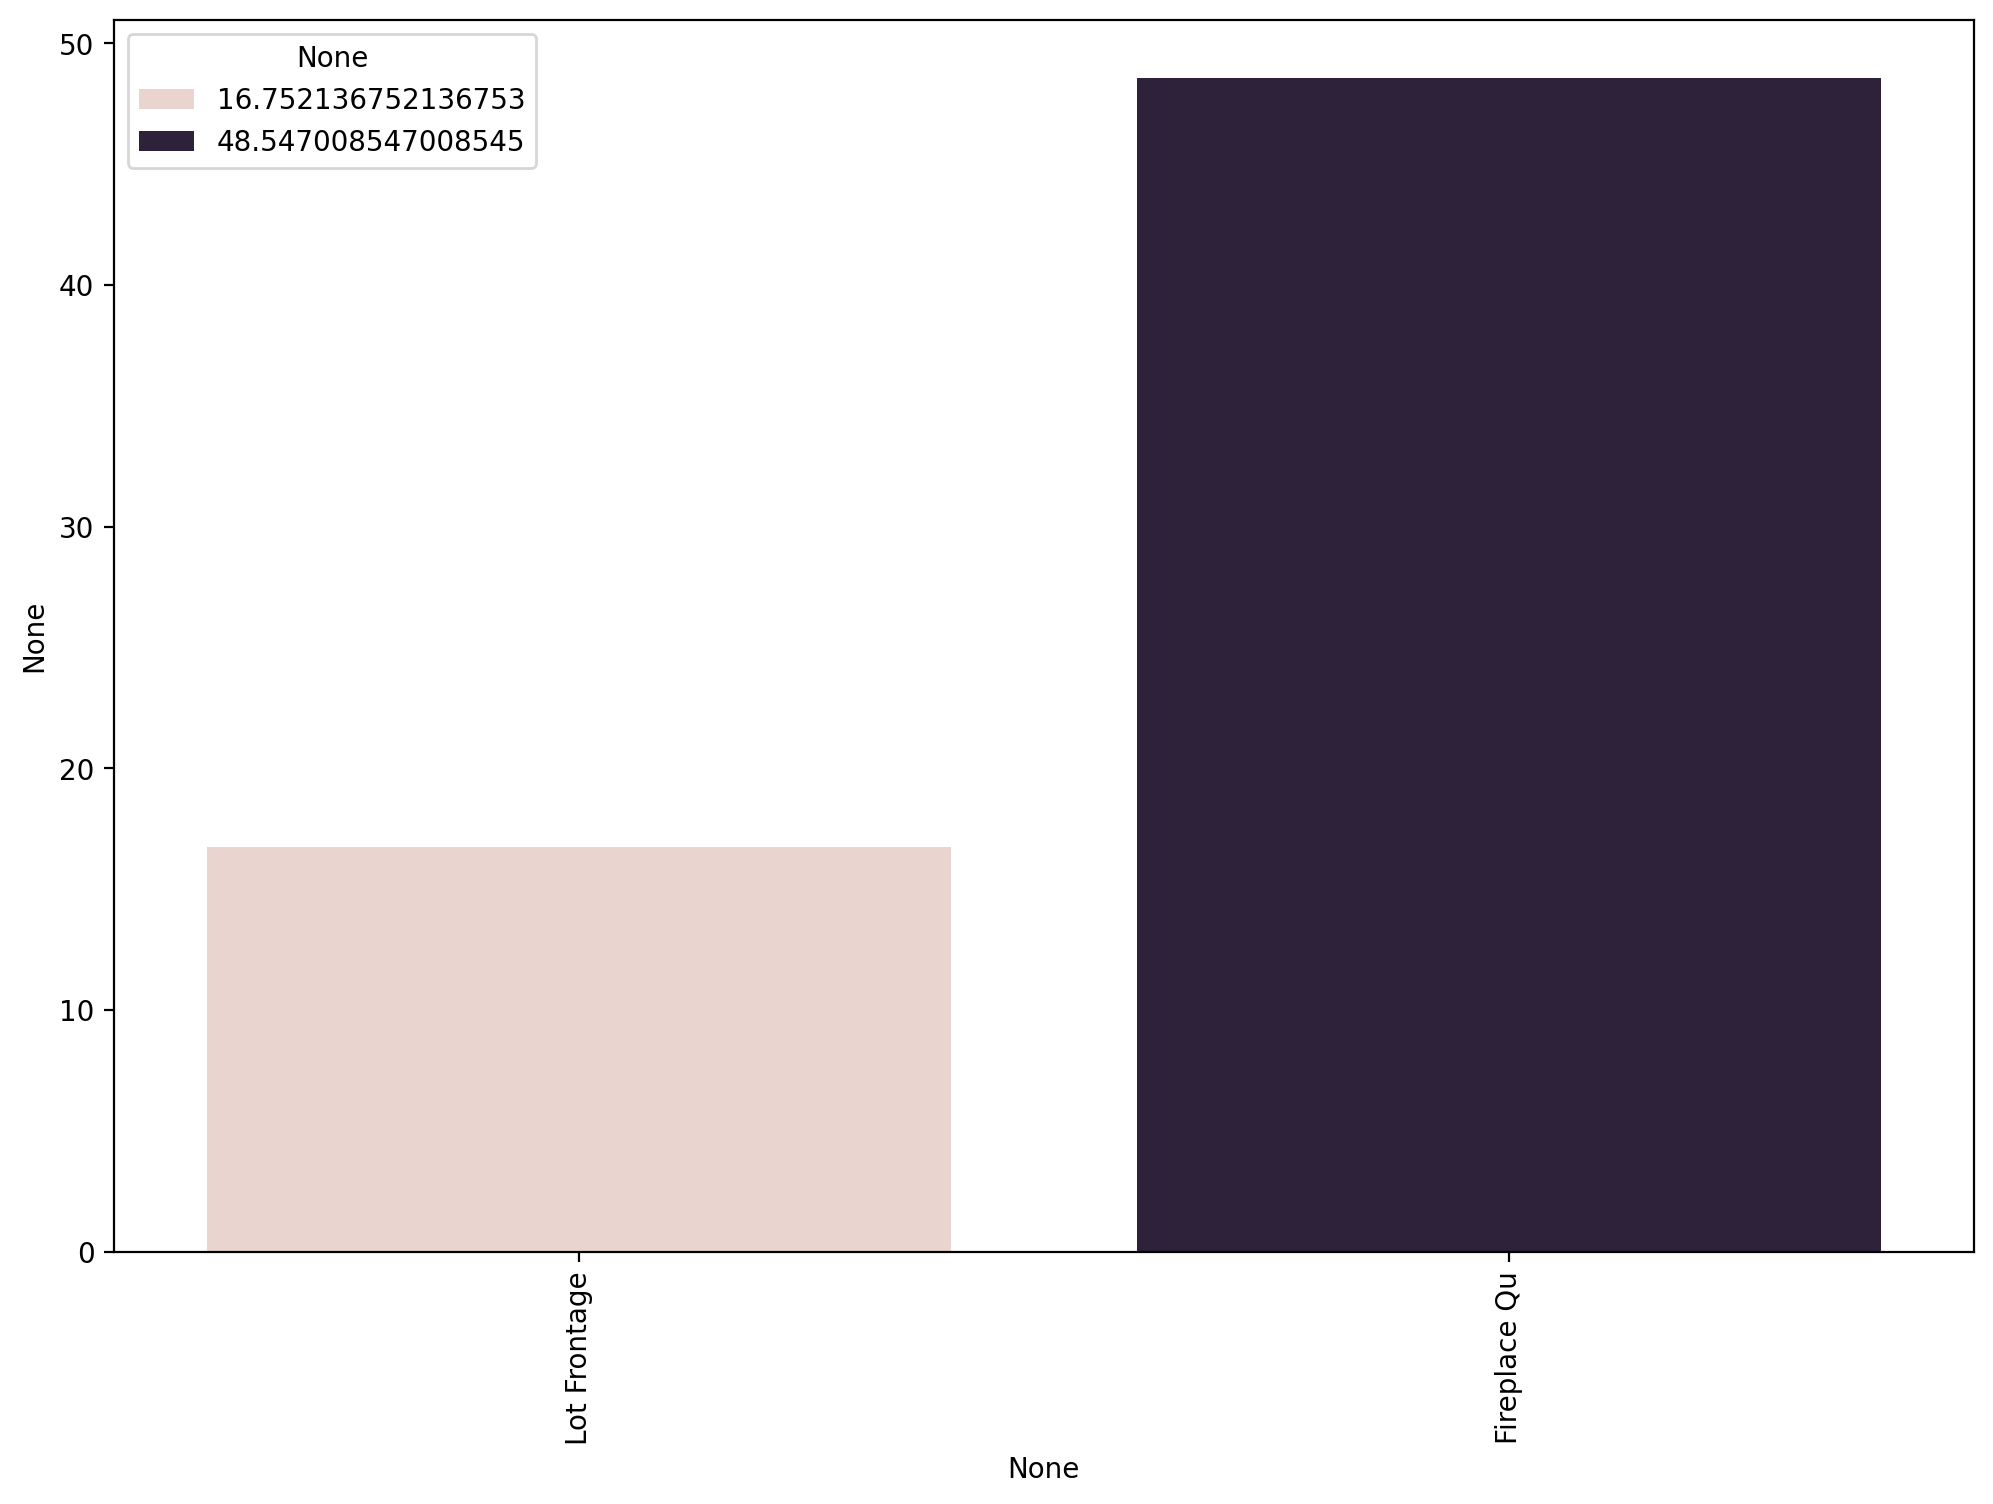

In [97]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.show()

## Заполняем колонку Fireplace Quality на основе текстового описания

In [100]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

Так как эта колонка является текстовой, то для неопределённых значений в ней мы также заменим их на **'None'**(текстовое значение).

In [104]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [108]:
percent_nan = percent_missing(df)

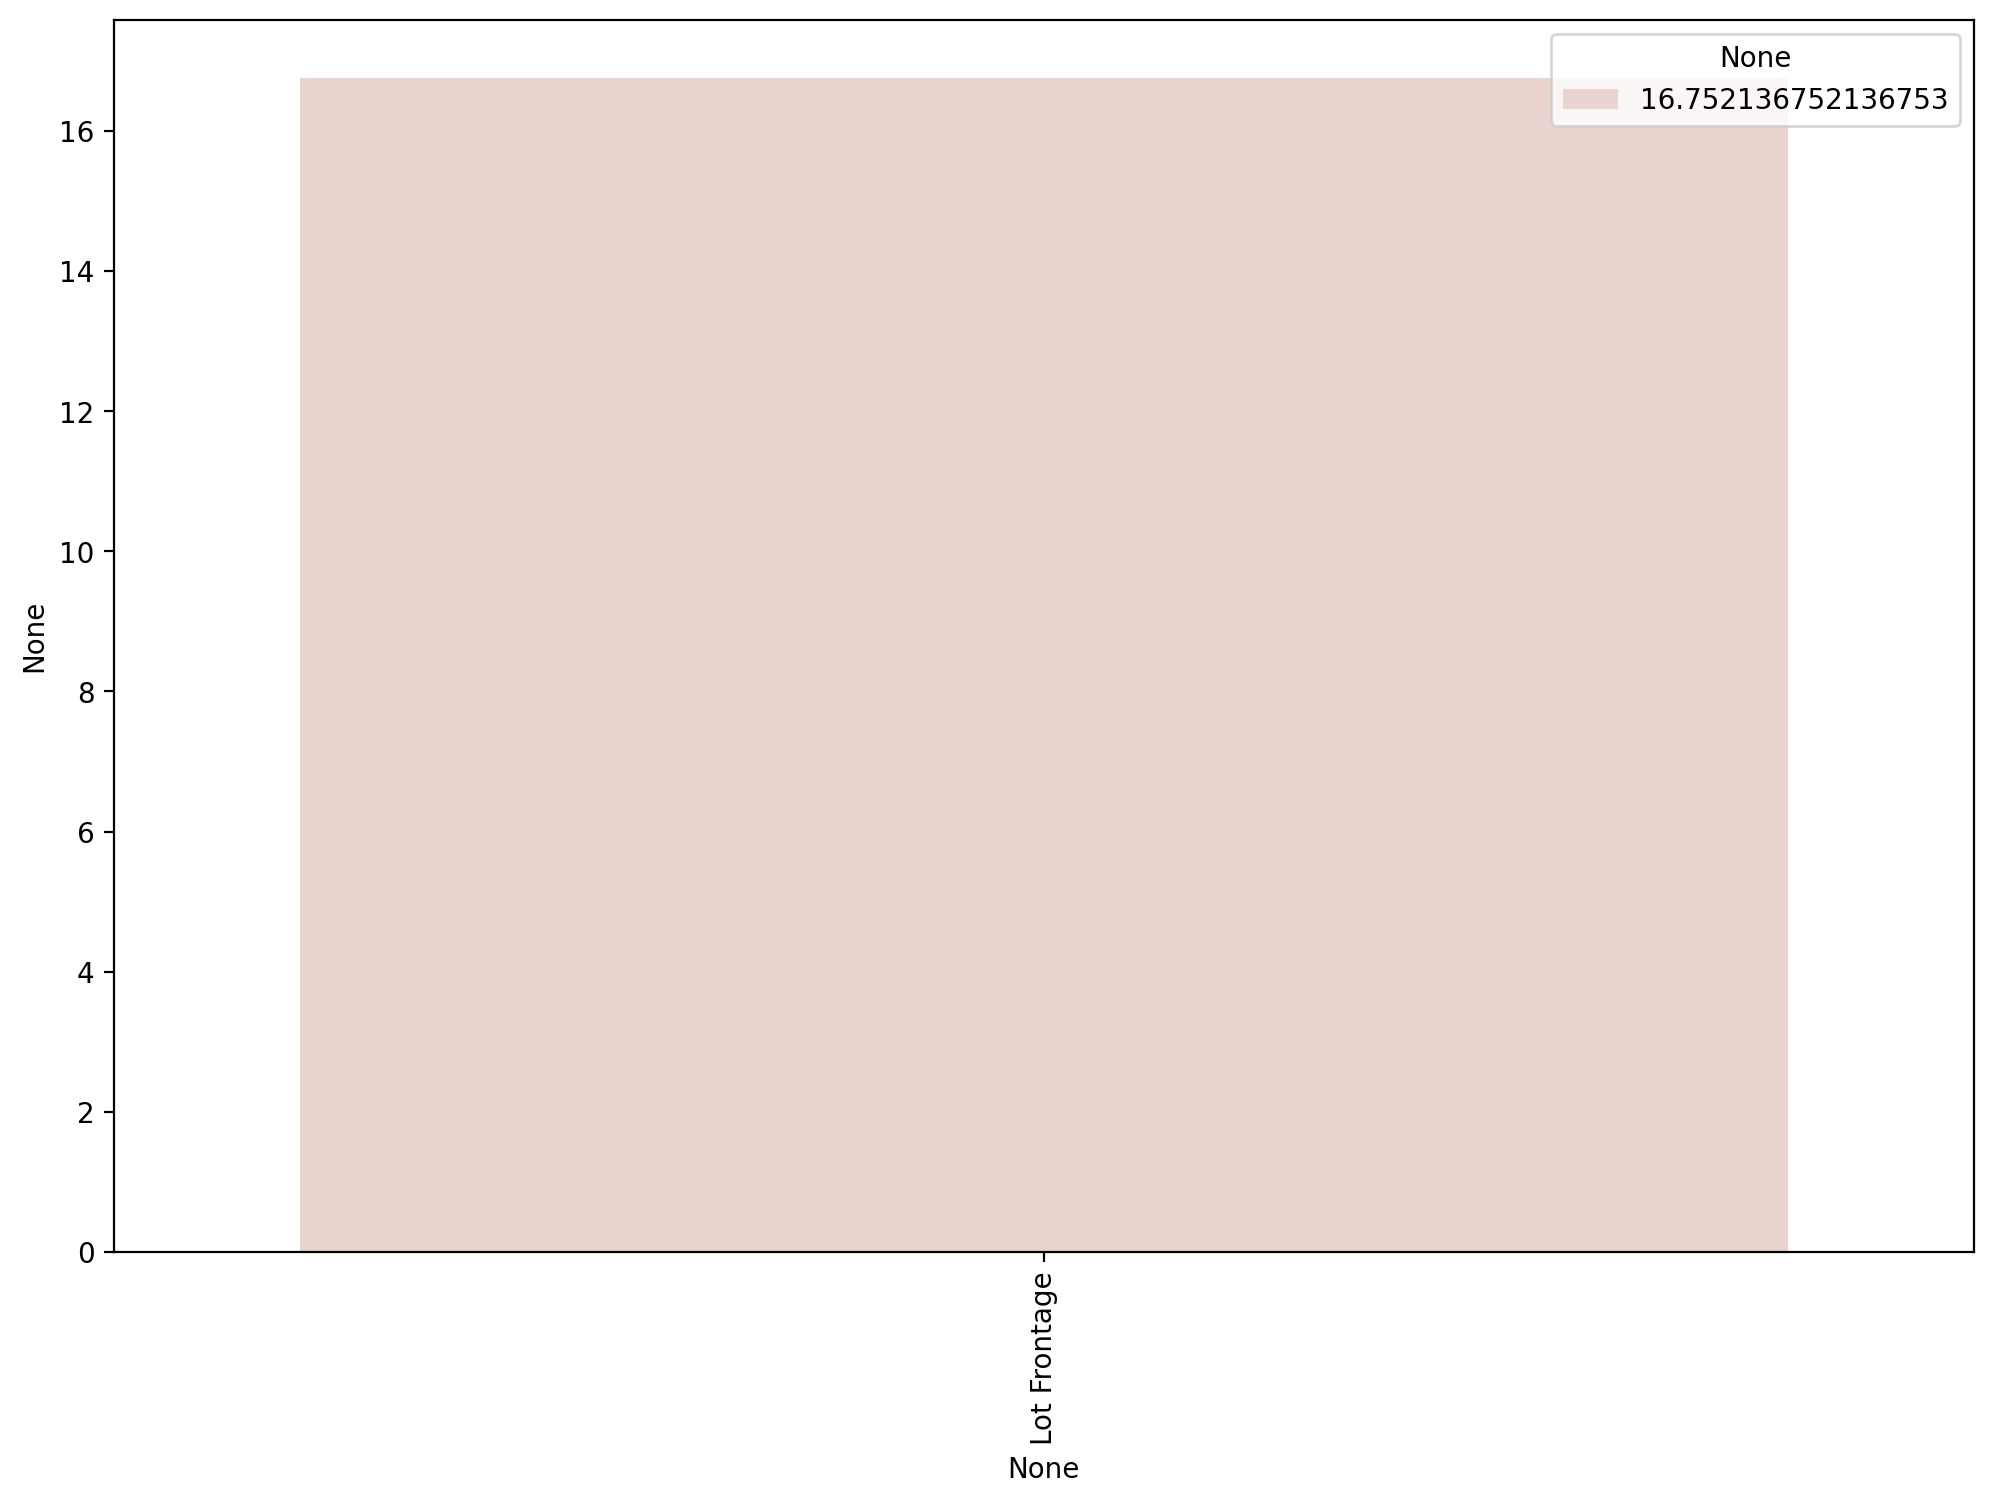

In [112]:
plt.figure(figsize=(12, 8), dpi=200)
# По оси x отложим значения индекса - названия признаков
# по оси y отложим сами значения пропущенных строк
sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan)
plt.xticks(rotation=90)
plt.show()

In [106]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

Эта колонка является числовой. Поэтому, мы не можем просто указать значение **'None'**, как мы делали для других колонок

## Замена отсутствующих данных каким-то другим значением

Чтобы заменить отсутствующие данные в заданном признаке, нам нужно решить, какой из других признаков (без значений NaN) лучше всего коррелирует с нашим признаком. В нашем примере мы будем работать со следующими признаками:

    * Neighborhood: районы внутри городской черты Ames
    * LotFrontage: ширина фронтальной стороны дома (со стороны улицы), в футах

Мы будем работать в предположении, что признак Lot Frontage коррелирует с признаком neighborhood.

Логика в следующем - если для какого-то дома значение Lot Frontage не указано, то возьмём значение Neighborhood, для него вычислим среднее значение колонки Lot Frontage для всех домов этого конкретного Neighborhood. После чего это среднее значение возьмем в качестве Lot Frontage для нужного дома.

In [120]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

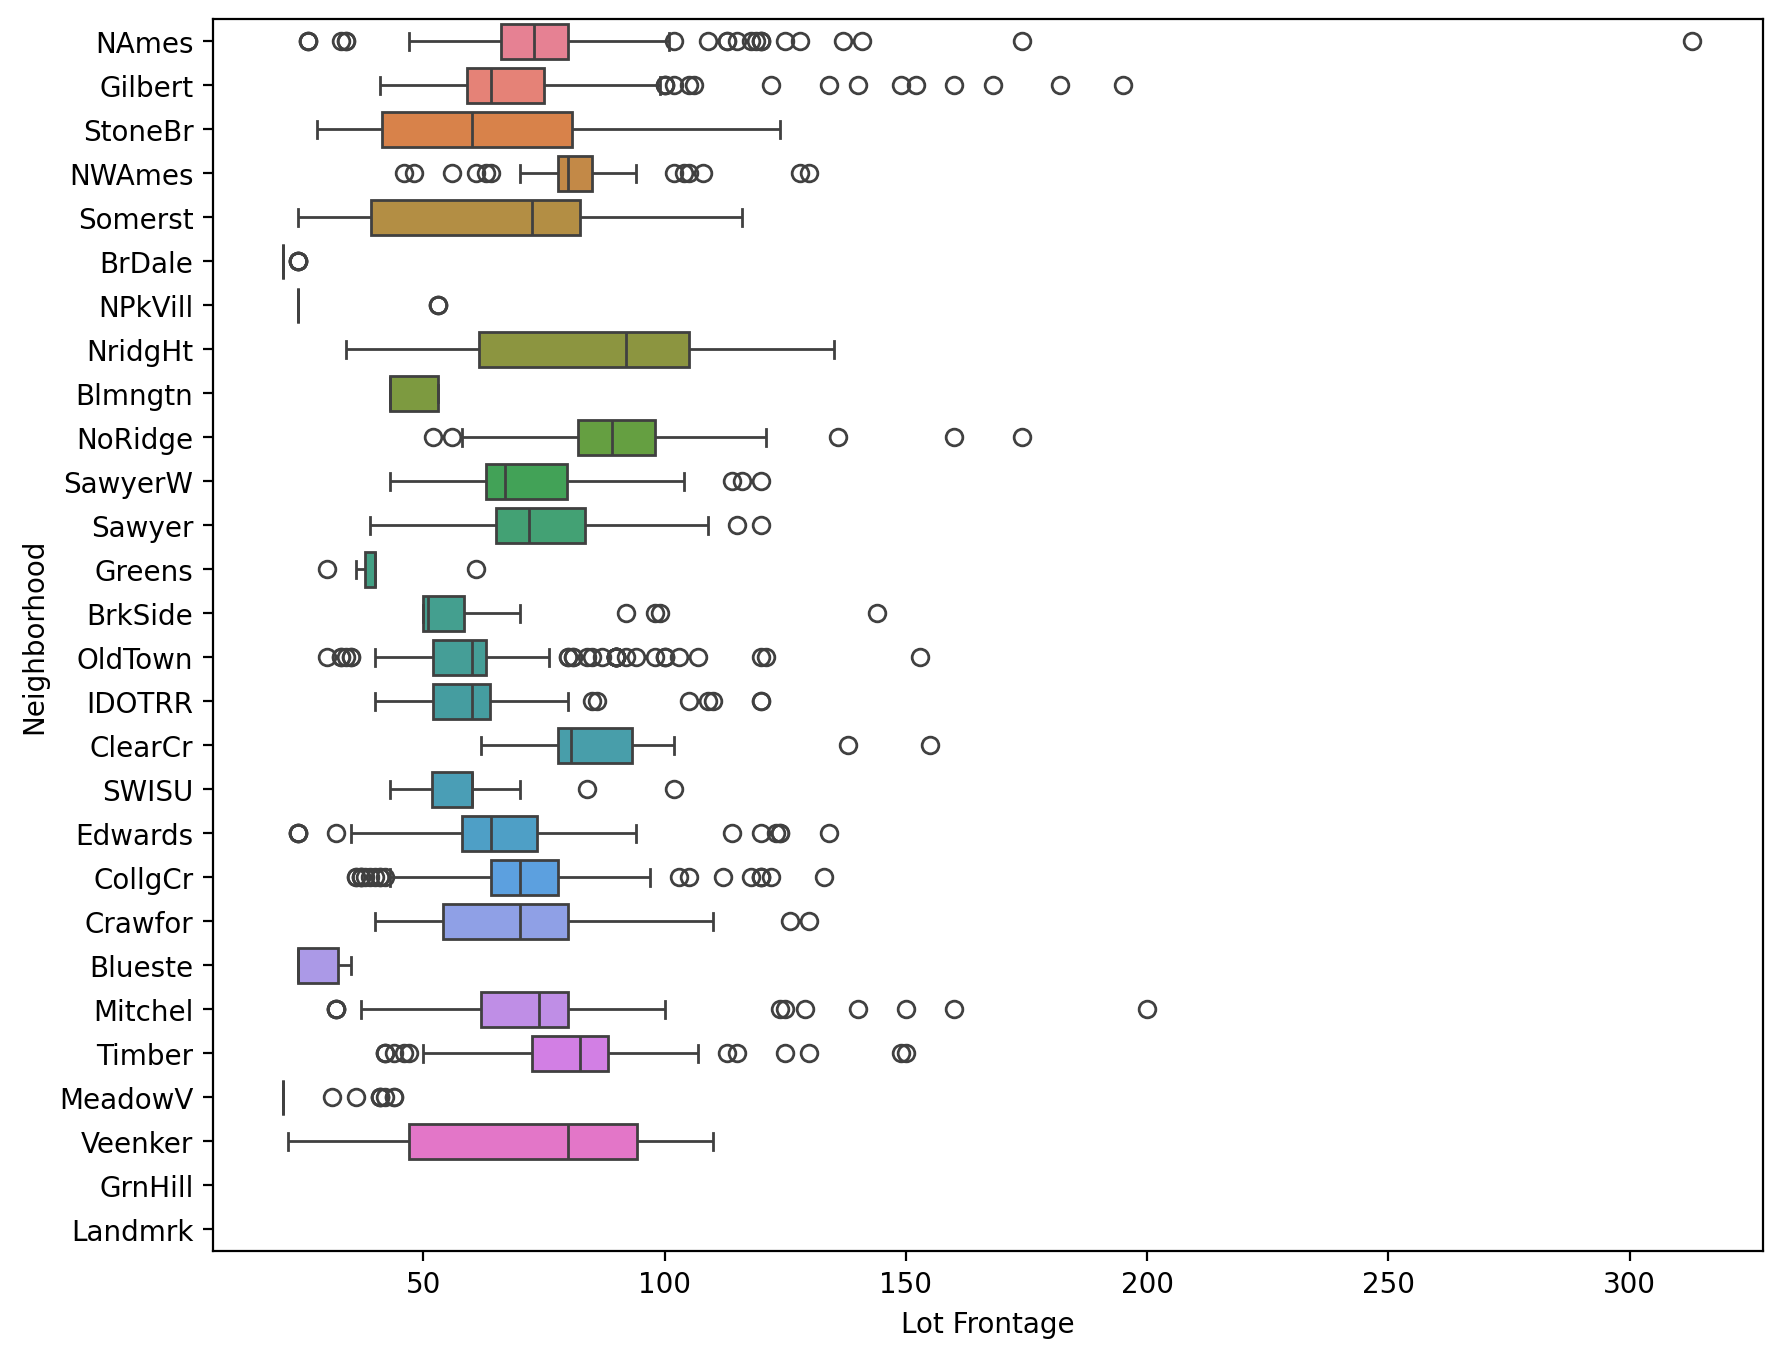

In [126]:
plt.figure(figsize=(10, 8), dpi=200)
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood', orient='h', hue='Neighborhood')
plt.show()

### Замена отсутствующих данных на основе других признаков
Есть и более сложные методы, но обычно чем проще метод, тем лучше. Тогда мы можем не создавать модели поверх других моделей.

Про дополнительные методы замены отсутствующих значений можно почитать в этой статье:  
https://scikit-learn.org/stable/modules/impute.html

In [130]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

Мы получили среднее значение **Lot Frontage** для каждого **Neighborhood**

## Трансформация колонки
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

Этот метод позволяет объединить между собой два метода - `.groupby()` и `.apply()`. Мы создадим функцию(среднее значение), которую мы применим одновременно с группировкой `.groupby()`. В итоге, не придётся создавать цикл `for`, чтобы выполнить эту операцию отдельно для каждого значения **Neighborhood**.

Помним, что `.groupby()` является ленивым объектом, для которого надо указывать некоторую функцию агрегации данных. Мы укажем метод `.transform()`, который позволяет применить к данным некоторую функцию, по аналогии с методом `.apply()`. В итоге эта команда пройдет по всем значениям **Lot Frontage** и если где-то значение отсутствует, то с помощью метода `.fillna()` запишится среднее значение вычисленное с помощью `.groupby()` по колонке **Neighborhood**.

In [137]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [139]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [141]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [143]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [145]:
df['Lot Frontage'].isnull().sum()

3

Осталось всего три дома, для которых значения не определены

In [148]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [150]:
df['Lot Frontage'].isnull().sum()

0

In [152]:
percent_nan = percent_missing(df)

In [154]:
percent_nan

Series([], dtype: float64)

Отлично! Теперь во всём нашем наборе данных нет отсутствующих значений! Все такие трансформации лучше реализовывать в виде функций, которые потом можно легко использовать. А теперь можно сохранить набор данных:

In [157]:
df.to_csv('Ames_NO_Missing_Data.csv')

---